# Module 5 Homework - Cleaning Up the MoMA Artwork 

In this lab, you will put your Pandas data cleaning skills to the test by cleaning up the MoMA artwork csv file.  Solve each of the following problems using the functions from `dfply`.  

For each problem, perform two steps.

1. Explore the specified column using the techniques from the last lecture.
2. Fix all issues found in part 1.

**Note that I will be looking for a literate, easy to follow, set of code and markdown cells.**  Part of your score will be determined by the cleanliness/conciseness of your presentation.

Where possible, solve each problem with one pipe.

In [1]:
import pandas as pd
from dfply import *
artwork = pd.read_csv("./data/Artworks.csv")

## Problem 1
    
**Task:** Explore the values of `artist.EndDate` and fix any issues.


In [2]:
artists = pd.read_csv("./data/Artists.csv")

In [3]:
artists.head()

#we can see already that we have problems with zero

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [4]:
artists.EndDate.describe()

count    15222.000000
mean       653.374195
std        930.004191
min          0.000000
25%          0.000000
50%          0.000000
75%       1959.000000
max       2020.000000
Name: EndDate, dtype: float64

In [5]:
#An EnDdate of 0 appears to mean either they have not died yet or unknown, which is a problem

(artists >>
  filter_by(X.EndDate == 0) >>
  head(50))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN
5,6,Danilo Aroldi,"Italian, born 1925",Italian,Male,1925,0,NaN,NaN
6,7,Bill Aron,"American, born 1941",American,Male,1941,0,NaN,NaN
7,9,David Aronson,"American, born Lithuania 1923",American,Male,1923,0,Q5230870,500003363.0
8,10,Irene Aronson,"American, born Germany 1918",American,Female,1918,0,Q19748568,500042413.0
10,12,Jüri Arrak,"Estonian, born 1936",Estonian,Male,1936,0,NaN,NaN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN


In [6]:
(artists >>
  filter_by(X.EndDate != 0) >>
  head(50))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,Male,1886,1966,Q153739,500031000.0
11,13,J. Arrelano Fischer,"Mexican, 1911–1995",Mexican,Male,1911,1995,NaN,NaN
12,15,Folke Arstrom,"Swedish, 1907–1997",Swedish,Male,1907,1997,NaN,NaN
13,16,Cristobal Arteche,"Spanish, 1900–1964",Spanish,Male,1900,1964,NaN,NaN
15,19,Richard Artschwager,"American, 1923–2013",American,Male,1923,2013,Q568262,500114981.0
16,21,Ruth Asawa,"American, 1926–2013",American,Female,1926,2013,Q7382874,500077806.0
18,23,Charles Robert Ashbee,"British, 1863–1942",British,Male,1863,1942,Q614071,500030367.0
20,25,E. M. Ashe,"American, 1867–1941",American,Male,1867,1941,NaN,NaN
22,27,Erik Gunnar Asplund,"Swedish, 1885–1940",Swedish,Male,1885,1940,Q312070,500011232.0


In [7]:
#they look clean otherwise

[tup for tup in zip(artists.EndDate.value_counts().index, artists.EndDate.value_counts())]

[(0, 10190),
 (1991, 86),
 (1999, 85),
 (1993, 80),
 (2004, 79),
 (1976, 78),
 (2001, 77),
 (1998, 76),
 (2013, 76),
 (2005, 76),
 (2010, 75),
 (2009, 75),
 (2007, 74),
 (2012, 74),
 (1992, 73),
 (1968, 71),
 (1988, 71),
 (2002, 70),
 (1983, 69),
 (1985, 69),
 (1994, 68),
 (2011, 68),
 (1995, 68),
 (1990, 67),
 (2006, 67),
 (2000, 67),
 (1986, 66),
 (1984, 66),
 (2008, 65),
 (1997, 65),
 (2015, 65),
 (1975, 65),
 (1978, 64),
 (1996, 64),
 (1989, 63),
 (1969, 62),
 (1982, 62),
 (2014, 61),
 (1980, 61),
 (1971, 60),
 (1981, 60),
 (1972, 60),
 (1966, 58),
 (1973, 57),
 (2003, 56),
 (1964, 56),
 (1987, 53),
 (2017, 53),
 (2016, 51),
 (1977, 50),
 (1979, 50),
 (1962, 48),
 (1965, 47),
 (1974, 46),
 (1970, 46),
 (1963, 45),
 (1967, 44),
 (1960, 44),
 (1956, 42),
 (2020, 42),
 (1954, 40),
 (1955, 40),
 (1942, 39),
 (2018, 38),
 (1957, 37),
 (2019, 37),
 (1944, 36),
 (1949, 35),
 (1961, 34),
 (1959, 34),
 (1940, 33),
 (1946, 32),
 (1945, 30),
 (1953, 30),
 (1941, 29),
 (1958, 29),
 (1938, 28),

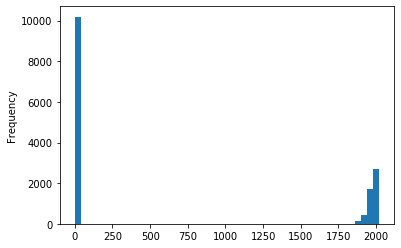

In [8]:
#these zeros will make problems for working with the data

artists.EndDate.plot(kind='hist', bins = 50)

Turning the 0s into NAs will allow us to actually utilize the column to yield results of interest. It will remove cases both where artists are either still alive or the artist is unknown. While we may be mixing cases here, as it stands, the data already does that and at present we are more concerned about making the column usable as it stands.

A simple solution is to simply turn the zeros in np.nans

In [9]:
replace_zero = {0:np.NaN}

test_artists = (artists 
>> mutate(EndDate = X.EndDate.replace(replace_zero))
)

In [10]:
#this does make it a float, but no data is lost.

test_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15222 non-null  int64  
 1   DisplayName    15222 non-null  object 
 2   ArtistBio      13017 non-null  object 
 3   Nationality    12770 non-null  object 
 4   Gender         12081 non-null  object 
 5   BeginDate      15222 non-null  int64  
 6   EndDate        5032 non-null   float64
 7   Wiki QID       3255 non-null   object 
 8   ULAN           2933 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.0+ MB


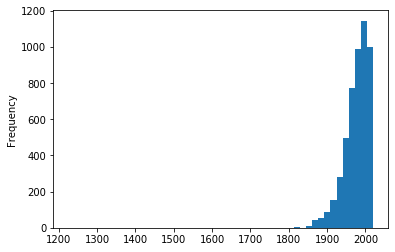

In [11]:
#this now works fine

test_artists.EndDate.plot(kind='hist', bins = 50)

## Problem 2
    
**Task:** Fix the issues with `artwork.Gender`

In [12]:
#those parenthesis will need to go, but the multiple items also looks pretty bad

artwork.Gender

0                   (Male)
1                   (Male)
2                   (Male)
3                   (Male)
4                   (Male)
                ...       
138146    () (Male) (Male)
138147            (Female)
138148            (Female)
138149            (Female)
138150            (Female)
Name: Gender, Length: 138151, dtype: object

In [13]:
#it appears that in columns with multiple artists, every gender is listed with some of them being unknown

[tup for tup in zip(artwork.Gender.value_counts().index, artwork.Gender.value_counts())]

() (Male) (Female) (Female)', 1),
 ('() () (Male) (Female) (Female) (Male) (Female)', 1),
 ('(Female) (Male) (Female) (Male) ()', 1),
 ('(Female) (Female) (Female) (Male)', 1),
 ('(Male) (Female) () (Male) ()', 1),
 ('() (Male) (Male) (Male) (Male) (Male) (Female) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Female) (Male) (Male) (Male) (Female)',
  1),
 ('() (Male) (Male) (Female) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male)',
  1),
 ('(Male) (Male) (Male) (Male) (Male) (Female) (Male) (Male) (Male) (Female) (Male) (Female) ()',
  1),
 ('() (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female) (Female)',
  1),
 ('(Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Female) (Male)',
  1),
 ('(Male) (Male) (Male) (Female) (Male) (Male) (Male)', 1),
 ('() (Male) (Non-Binary) (Female) (Female) (Female)', 1),
 ('() (Female) (Fe

In [14]:
#mutliple artists per column
artwork.Artist

0                                               Otto Wagner
1                                  Christian de Portzamparc
2                                                Emil Hoppe
3                                           Bernard Tschumi
4                                                Emil Hoppe
                                ...                        
138146    Chesnutt Brothers Studio, Andrew Chesnutt, Lew...
138147                                   Sophie Taeuber-Arp
138148                                   Sophie Taeuber-Arp
138149                                   Sophie Taeuber-Arp
138150                                   Sophie Taeuber-Arp
Name: Artist, Length: 138151, dtype: object

In [15]:
(artwork 
 >> filter_by(X.Gender == '(Male)')
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1841,-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),-1944,0,(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),-1944,0,(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138105,Lot 111113 (flare 1),Donald Moffett,7435,"(American, born 1955)",(American),-1955,0,(Male),2013,Acrylic and lacquer on linen with cotton and a...,...,NaN,NaN,0.0,NaN,137.160274,NaN,NaN,111.760223,NaN,NaN
138108,"Cullinan Wing Addition, The Museum of Fine Art...",Ludwig Mies van der Rohe,7166,"(American, born Germany. 1886–1969)",(American),-1886,-1969,(Male),1954,Ink on paper,...,NaN,NaN,NaN,NaN,12.700025,NaN,NaN,20.320041,NaN,NaN
138109,"Cullinan Wing Addition, The Museum of Fine Art...",Ludwig Mies van der Rohe,7166,"(American, born Germany. 1886–1969)",(American),-1886,-1969,(Male),1954,Ink on paper,...,NaN,NaN,NaN,NaN,12.700025,NaN,NaN,20.320041,NaN,NaN
138120,"Title page (folio 2) from Mörder, Hoffnung der...",Oskar Kokoschka,3197,"(Austrian, 1886–1980)",(Austrian),-1886,-1980,(Male),1916 (original executed in 1910),Line block reproduction from an illustrated bo...,...,http://www.moma.org/media/W1siZiIsIjEyNjMwNiJd...,NaN,NaN,NaN,10.500000,NaN,NaN,8.000000,NaN,NaN


In [16]:
(artwork 
 >> filter_by(X.Gender == '(Female)')
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
152,"The Peak Project, Hong Kong, China (Exterior p...",Zaha Hadid,6953,"(British, born Iraq. 1950–2016)",(British),-1950,-2016,(Female),1991,Synthetic polymer on paper mounted on canvas,...,http://www.moma.org/media/W1siZiIsIjE5MzgiXSxb...,NaN,NaN,NaN,129.540300,NaN,NaN,182.880400,NaN,NaN
295,"Parc de la Villette Project, Paris, France (Pl...",Zaha Hadid,6953,"(British, born Iraq. 1950–2016)",(British),-1950,-2016,(Female),1982-83,Colored pencil on tracing paper,...,http://www.moma.org/media/W1siZiIsIjU1OTIiXSxb...,NaN,NaN,NaN,29.845100,NaN,NaN,41.910100,NaN,NaN
296,"Parc de la Villette project, Paris, France",Zaha Hadid,6953,"(British, born Iraq. 1950–2016)",(British),-1950,-2016,(Female),1982–1983,See individual records.,...,NaN,NaN,NaN,NaN,41.910100,NaN,NaN,29.845100,NaN,NaN
297,"Parc de la Villette Project, Paris, France (Sc...",Zaha Hadid,6953,"(British, born Iraq. 1950–2016)",(British),-1950,-2016,(Female),1982-83,Graphite on tracing paper,...,http://www.moma.org/media/W1siZiIsIjU1OTQiXSxb...,NaN,NaN,NaN,29.845100,NaN,NaN,41.910100,NaN,NaN
298,"Parc de la Villette Project, Paris, France (Cu...",Zaha Hadid,6953,"(British, born Iraq. 1950–2016)",(British),-1950,-2016,(Female),1982-83,Colored pencil on tracing paper,...,http://www.moma.org/media/W1siZiIsIjU1OTYiXSxb...,NaN,NaN,NaN,29.845100,NaN,NaN,41.910100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138118,May's Blue Eye,Farah Al Qasimi,131770,"(Emirati, born 1991)",(Emirati),-1991,0,(Female),2020,Pigmented inkjet print,...,NaN,NaN,0.0,NaN,63.500127,NaN,NaN,45.720091,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJd...,NaN,NaN,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJd...,NaN,NaN,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,NaN,NaN,NaN,11.000000,NaN,NaN,10.000000,NaN,NaN


In [17]:
(artwork 
 >> filter_by(X.Gender == '()')
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
605,Charrette Submission for The Museum of Modern ...,Bernard Tschumi Architects,8057,(Swiss),(Swiss),0,0,(),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
608,Charrette Submission for The Museum of Modern ...,Rafael Viñoly Architects,8805,(American),(American),0,0,(),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
611,Charrette Submission for The Museum of Modern ...,Tod Williams Billie Tsien and Associates,8855,NaN,(),0,0,(),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
871,"Offices for Willis Faber & Dumas Ltd., Ipswich...",Foster Associates,1953,"(British, founded 1967)",(British),-1967,0,(),1970-75,Plastic,...,http://www.moma.org/media/W1siZiIsIjIyODAyMyJd...,NaN,120.3327,NaN,27.9401,NaN,NaN,95.2502,NaN,NaN
872,"Offices for Willis Faber & Dumas Ltd., Ipswich...",Foster Associates,1953,"(British, founded 1967)",(British),-1967,0,(),1970-75,NaN,...,NaN,NaN,162.0000,NaN,34.2901,NaN,NaN,138.4303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138141,Untitled,Unknown photographer,8595,NaN,(),0,0,(),c. 1910,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxMyJd...,NaN,NaN,NaN,6.0000,NaN,NaN,10.5000,NaN,NaN
138142,Untitled,Unknown photographer,8595,NaN,(),0,0,(),c. 1910,"Gelatin silver print, printed later",...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNCJd...,NaN,NaN,NaN,20.5000,NaN,NaN,33.2000,NaN,NaN
138143,Untitled,Unknown photographer,8595,NaN,(),0,0,(),c. 1918-30,Gelatin silver print (postcard),...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNiJd...,NaN,NaN,NaN,10.2000,NaN,NaN,8.6000,NaN,NaN
138144,Untitled,Unknown photographer,8595,NaN,(),0,0,(),c. 1900,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxOCJd...,NaN,NaN,NaN,16.3600,NaN,NaN,24.7000,NaN,NaN


Of the 138151 row in artwork, singular artists make up 129,319 of them. (from male 104140 + female 17821 + Unknown 7358 ), accounting for about 93.6% of cases.

While valid data, each of these items will need to be placed into its own column in order stay within the golden rule. However, some of these tuples can have 17+ people in them. Furthermore, we have no guarentee that they are in the same order as the artists listed in. Either way, they need to be split somehow. Empty parenthesis should also be changed to (Unknown) for cleanliness.

The current plan is:
   
    1. replace "()" with "(Unknown)"

    2. Make new columns for each Gender

    3. Define non null undefined Uknowns as "(Missing)"
    


In [18]:
artwork_test = artwork

In [19]:
#I will proof of concept this is base pandas first to make sure it works


artwork_test['Gender'] = artwork.Gender.str.replace('\(\)', '(Unknown)')

artwork_test['Gender']

0                          (Male)
1                          (Male)
2                          (Male)
3                          (Male)
4                          (Male)
                   ...           
138146    (Unknown) (Male) (Male)
138147                   (Female)
138148                   (Female)
138149                   (Female)
138150                   (Female)
Name: Gender, Length: 138151, dtype: object

In [20]:
 Gender_Columns = artwork_test['Gender'].str.split("\s", expand = True).add_prefix("Gender_")

 Gender_Columns

,Gender_0,Gender_1,Gender_2,Gender_3,Gender_4,Gender_5,Gender_6,Gender_7,Gender_8,Gender_9,...,Gender_37,Gender_38,Gender_39,Gender_40,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46
0,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,(Male),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,(Unknown),(Male),(Male),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138147,(Female),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138148,(Female),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
138149,(Female),None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [21]:
artwork_solution_test = pd.concat([artwork_test, Gender_Columns], axis=1)

artwork_solution_test



,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Gender_37,Gender_38,Gender_39,Gender_40,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1841,-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,...,None,None,None,None,None,None,None,None,None,None
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),-1944,0,(Male),1987,Paint and colored pencil on print,...,None,None,None,None,None,None,None,None,None,None
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,None,None,None,None,None,None,None,None,None,None
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),-1944,0,(Male),1980,Photographic reproduction with colored synthet...,...,None,None,None,None,None,None,None,None,None,None
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,...,None,None,None,None,None,None,None,None,None,None
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,None,None,None,None,None,None,None,None,None,None
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,None,None,None,None,None,None,None,None,None,None
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,None,None,None,None,None,None,None,None,None,None


In [22]:
#works on the worst case

artwork_solution_test >> filter_by(X.Gender_46 == "(Male)")

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Gender_37,Gender_38,Gender_39,Gender_40,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46
65447,Artifacts at the End of a Decade,"Various Artists, Harry Anderson, Laurie Anders...","6105, 6848, 6807, 66807, 6809, 6810, 6811, 681...","(American) (American, born 1943) (American, bo...",(American) (American) (American) (American) (A...,(0) (1943) (1947) (1922) (1927) (1951) (1940) ...,(0) (0) (0) (2011) (2017) (1992) (0) (0) (0) (...,(Unknown) (Male) (Female) (Male) (Male) (Male)...,1981,Portfolio of forty-four mixed medium prints,...,(Female),(Male),(Unknown),(Male),(Female),(Male),(Male),(Female),(Male),(Male)


That seems to work, now to make it clean and more inclusive.

In [23]:
(artwork
>> mutate(Gender = X.Gender.str.replace('\(\)', '(Unknown)'))
).Gender.isnull().values.any()

True

In [24]:
artwork >> filter_by(X.Gender.isnull())

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1354,Mat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c. 1930-40,Linen,...,NaN,NaN,NaN,NaN,NaN,61.0,NaN,45.720100,NaN,NaN
1929,Bread Knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,31.1,NaN,2.857506,NaN,NaN
1939,Combination Meat Chopper and Tenderizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,27.3,NaN,5.397511,NaN,NaN
2107,Padlocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,Steel,...,NaN,NaN,3.81,NaN,7.620000,NaN,NaN,10.477500,NaN,NaN
2469,Wine Bottle Stand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.1955,Silver-plated metal and raffia wrapping,...,NaN,NaN,19.05,NaN,20.955000,NaN,NaN,9.366300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135668,"Concert Fluxus, Vila Nova de Cerveira, Portugal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug-80,18 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135669,"1962 Wiesbaden Fluxus 1982, Wiesbaden",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982,13 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137426,Deutsche Bucherei Leipzig IX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,Chromogenic color print,...,NaN,NaN,NaN,NaN,58.420117,NaN,NaN,58.420117,NaN,NaN
137429,Untitled (Portrait of Artist's Niece),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,Chromogenic color print,...,NaN,NaN,NaN,NaN,93.980188,NaN,NaN,124.460249,NaN,NaN


While rare, a few cells in Gender are NAN, due to their being no information on any artists. This is different from unknown, where the case is where there is some information about the artist, but nothing conclusive. Therefore, it is made into its own case labeled "(Missing)".

In [25]:
replace_nan = {np.NaN:"(Missing)"}

(artwork
>> mutate(Gender = X.Gender.str.replace('\(\)', '(Unknown)'))
>> mutate(Gender = X.Gender.replace(replace_nan))
).Gender.isnull().values.any()

False

We know from our work above that in the worst case 47 artists have worked on a painting. Therefore, we will need at least as many in order to clean the data properly. we can quickly make a list of the columns below with a list comprehension

In [26]:
Columns_needed = map(str, range(0, 47))
Gender_Columns = ['Gender_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
Gender_Columns

['Gender_1',
 'Gender_2',
 'Gender_3',
 'Gender_4',
 'Gender_5',
 'Gender_6',
 'Gender_7',
 'Gender_8',
 'Gender_9',
 'Gender_10',
 'Gender_11',
 'Gender_12',
 'Gender_13',
 'Gender_14',
 'Gender_15',
 'Gender_16',
 'Gender_17',
 'Gender_18',
 'Gender_19',
 'Gender_20',
 'Gender_21',
 'Gender_22',
 'Gender_23',
 'Gender_24',
 'Gender_25',
 'Gender_26',
 'Gender_27',
 'Gender_28',
 'Gender_29',
 'Gender_30',
 'Gender_31',
 'Gender_32',
 'Gender_33',
 'Gender_34',
 'Gender_35',
 'Gender_36',
 'Gender_37',
 'Gender_38',
 'Gender_39',
 'Gender_40',
 'Gender_41',
 'Gender_42',
 'Gender_43',
 'Gender_44',
 'Gender_45',
 'Gender_46',
 'Gender_47']

Now, it is just a matter of using seperate in the pipe

In [27]:
replace_nan = {np.NaN:"(Missing)"}

(artwork
>> mutate(Gender = X.Gender.str.replace('\(\)', '(Unknown)'))
>> mutate(Gender = X.Gender.replace(replace_nan))
>> separate(X.Gender, Gender_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   Nationality         136868 non-null  object 
 5   BeginDate           136868 non-null  object 
 6   EndDate             136868 non-null  object 
 7   Date                135949 non-null  object 
 8   Medium              128450 non-null  object 
 9   Dimensions          128397 non-null  object 
 10  CreditLine          135714 non-null  object 
 11  AccessionNumber     138151 non-null  object 
 12  Classification      138151 non-null  object 
 13  Department          138151 non-null  object 
 14  DateAcquired        131026 non-null  object 
 15  Cataloged           138151 non-nul

In [28]:
#one last check to make sure 47 is correct

replace_nan = {np.NaN:"(Missing)"}

(artwork
>> mutate(Gender = X.Gender.str.replace('\(\)', '(Unknown)'))
>> mutate(Gender = X.Gender.replace(replace_nan))
>> separate(X.Gender, Gender_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> select(X.Gender_46)
>> filter_by(X.Gender_46.isnull() != True)
)

,Gender_46
65447,(Male)


In [73]:
replace_nan = {np.NaN:"(Missing)"}

(artwork
>> mutate(Gender = X.Gender.str.replace('\(\)', '(Unknown)'))
>> mutate(Gender = X.Gender.replace(replace_nan))
>> separate(X.Gender, Gender_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> select(X.Gender_1, X.Gender_2, X.Gender_3, X.Gender_4, X.Gender_5)
)

,Gender_1,Gender_2,Gender_3,Gender_4,Gender_5
0,(Male),NaN,NaN,NaN,NaN
1,(Male),NaN,NaN,NaN,NaN
2,(Male),NaN,NaN,NaN,NaN
3,(Male),NaN,NaN,NaN,NaN
4,(Male),NaN,NaN,NaN,NaN
...,...,...,...,...,...
138146,(Unknown),(Male),(Male),NaN,NaN
138147,(Female),NaN,NaN,NaN,NaN
138148,(Female),NaN,NaN,NaN,NaN
138149,(Female),NaN,NaN,NaN,NaN


The finished pipe below fixes the issues with Gender to the best of our current ability

In [29]:
replace_nan = {np.NaN:"(Missing)"}

(artwork
>> mutate(Gender = X.Gender.str.replace('\(\)', '(Unknown)'))
>> mutate(Gender = X.Gender.replace(replace_nan))
>> separate(X.Gender, Gender_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Date,Medium,Dimensions,...,Gender_38,Gender_39,Gender_40,Gender_41,Gender_42,Gender_43,Gender_44,Gender_45,Gender_46,Gender_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1841,-1918,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),-1944,0,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),-1944,0,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Problem 3
    
**Task:** Fix the issues with `artwork.BeginDate` and `artwork.EndDate`.  Note that you will want to convert to `.astype('int64')` at the end of the expression.

While similar in many ways, to ensure nothing is missed, I will start by handling them seperatly

In [30]:
#taking a look here, we see that Endate is the wrong type and includes punctuation

artwork.EndDate

0                     -1918
1                         0
2                     -1957
3                         0
4                     -1957
                ...        
138146    (0) (1934) (1933)
138147                -1943
138148                -1943
138149                -1943
138150                -1943
Name: EndDate, Length: 138151, dtype: object

In [31]:
artwork.EndDate.value_counts().index

Index(['0', '-1927', '-2010', '-1985', '-1969', '-1954', '-1973', '-1976',
       '-1947', '(0) (0)',
       ...
       '(1971) (1974) (1947) (1985) (1952) (1917) (1967) (1956)',
       '(1997) (0) (0) (2005)', '(1938) (1989)', '(1993) (1987) (0)',
       '(2012) (1994)', '(2006) (2008)', '(0) (1964) (1994)',
       '(0) (0) (0) (0) (0) (2004) (0) (0) (0)', '(0) (1969)',
       '(2017) (0) (0) (0) (0) (0) (0)'],
      dtype='object', length=1286)

In [32]:
#meanwhile, we have missing values similar to Begindate in the last section

(artwork
>> filter_by(X.EndDate.isnull())
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1354,Mat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c. 1930-40,Linen,...,NaN,NaN,NaN,NaN,NaN,61.0,NaN,45.720100,NaN,NaN
1929,Bread Knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,31.1,NaN,2.857506,NaN,NaN
1939,Combination Meat Chopper and Tenderizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,27.3,NaN,5.397511,NaN,NaN
2107,Padlocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,Steel,...,NaN,NaN,3.81,NaN,7.620000,NaN,NaN,10.477500,NaN,NaN
2469,Wine Bottle Stand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.1955,Silver-plated metal and raffia wrapping,...,NaN,NaN,19.05,NaN,20.955000,NaN,NaN,9.366300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135668,"Concert Fluxus, Vila Nova de Cerveira, Portugal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug-80,18 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135669,"1962 Wiesbaden Fluxus 1982, Wiesbaden",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982,13 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137426,Deutsche Bucherei Leipzig IX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,Chromogenic color print,...,NaN,NaN,NaN,NaN,58.420117,NaN,NaN,58.420117,NaN,NaN
137429,Untitled (Portrait of Artist's Niece),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,Chromogenic color print,...,NaN,NaN,NaN,NaN,93.980188,NaN,NaN,124.460249,NaN,NaN


In [33]:
#for columns with multiple dates, lets see if we can try to find the correct one somewhere else

(artwork
>> filter_by(X.EndDate.isnull() == False)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1841,-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),-1944,0,(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),-1944,0,(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJd...,NaN,NaN,NaN,10.795022,NaN,NaN,16.510033,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJd...,NaN,NaN,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJd...,NaN,NaN,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,NaN,NaN,NaN,11.000000,NaN,NaN,10.000000,NaN,NaN


In [34]:
#we should check to see if (0) means missing data or that artist has not died yet

(artwork
>> filter_by(X.EndDate == '(0)')
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)


Since when the artist is unknown it is also decided upon as (0), we know it means missing data. Currently, it can mean either so it is likely best to just consider it null so that the zeros do not interfere with calculations. However, at the same time, it cells that pertain to mulitple artists, the zero still means someone contributed, so we will still keep them at zero to keep relations between the artist and their associated endate intact

It appears that for the cases with multiple dates, its because there were multiple artists. This data does need to be preserved, but it also need to be in their own columns to make analysis possible. The solution is going to be making a new column to seperate out these dates.

The good news is that dates are always split by spaces, so we do not have to get crazy with regex to accomplish such.

The plan is:

    1. remove all punctuation from the column

    2. replace all np.nan with zeros for for consistency

    3. make the new columns ints

    4. split the column based on the amount of content in it

    5. rename the columns

    6. replace the zeros in the new columns

In [35]:
replace_nan = {0:np.NaN}

(artwork
>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   Nationality         136868 non-null  object 
 5   BeginDate           136868 non-null  object 
 6   EndDate             136868 non-null  object 
 7   Gender              136868 non-null  object 
 8   Date                135949 non-null  object 
 9   Medium              128450 non-null  object 
 10  Dimensions          128397 non-null  object 
 11  CreditLine          135714 non-null  object 
 12  AccessionNumber     138151 non-null  object 
 13  Classification      138151 non-null  object 
 14  Department          138151 non-null  object 
 15  DateAcquired        131026 non-nul

In [36]:
#replace nulls and check

replace_np = {np.NaN:'0'}

(artwork
>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
).EndDate.isnull().values.any()

False

From our last section, we know that the worst case is 47, and our splitting method will be much the same

In [37]:
Columns_needed = map(str, range(0, 47))
EndDate_Columns = ['EndDate_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
EndDate_Columns

['EndDate_1',
 'EndDate_2',
 'EndDate_3',
 'EndDate_4',
 'EndDate_5',
 'EndDate_6',
 'EndDate_7',
 'EndDate_8',
 'EndDate_9',
 'EndDate_10',
 'EndDate_11',
 'EndDate_12',
 'EndDate_13',
 'EndDate_14',
 'EndDate_15',
 'EndDate_16',
 'EndDate_17',
 'EndDate_18',
 'EndDate_19',
 'EndDate_20',
 'EndDate_21',
 'EndDate_22',
 'EndDate_23',
 'EndDate_24',
 'EndDate_25',
 'EndDate_26',
 'EndDate_27',
 'EndDate_28',
 'EndDate_29',
 'EndDate_30',
 'EndDate_31',
 'EndDate_32',
 'EndDate_33',
 'EndDate_34',
 'EndDate_35',
 'EndDate_36',
 'EndDate_37',
 'EndDate_38',
 'EndDate_39',
 'EndDate_40',
 'EndDate_41',
 'EndDate_42',
 'EndDate_43',
 'EndDate_44',
 'EndDate_45',
 'EndDate_46',
 'EndDate_47']

In [38]:
#same seperater


(artwork
>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
>> separate(X.EndDate, EndDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   Nationality         136868 non-null  object 
 5   BeginDate           136868 non-null  object 
 6   Gender              136868 non-null  object 
 7   Date                135949 non-null  object 
 8   Medium              128450 non-null  object 
 9   Dimensions          128397 non-null  object 
 10  CreditLine          135714 non-null  object 
 11  AccessionNumber     138151 non-null  object 
 12  Classification      138151 non-null  object 
 13  Department          138151 non-null  object 
 14  DateAcquired        131026 non-null  object 
 15  Cataloged           138151 non-nul

In [39]:
#the cases appear identical to the one above, but will still check the last column to ensure we do not need additional columns (or have to many)

(artwork
>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
>> separate(X.EndDate, EndDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> select(X.EndDate_47)
>> filter_by(X.EndDate_47.isnull() == False)
)



,EndDate_47
65447,0.0


Now that the years are in the right columns for the right individuals, we can turn those zero's into NaNs

In [40]:
#we can borrow the EndDate_Columns list we made earlier

replace_zero = {0:np.NaN,0.0:np.NaN}

EndDate_intents = {'{0}'.format(c):X[c].replace(replace_zero)
                  for c in EndDate_Columns}

EndDate_intents

{'EndDate_1': <dfply.base.Intention at 0x7fc21228ba10>,
 'EndDate_2': <dfply.base.Intention at 0x7fc21265c450>,
 'EndDate_3': <dfply.base.Intention at 0x7fc212663ed0>,
 'EndDate_4': <dfply.base.Intention at 0x7fc2123eb750>,
 'EndDate_5': <dfply.base.Intention at 0x7fc2122203d0>,
 'EndDate_6': <dfply.base.Intention at 0x7fc2124efad0>,
 'EndDate_7': <dfply.base.Intention at 0x7fc212a3e150>,
 'EndDate_8': <dfply.base.Intention at 0x7fc21215b050>,
 'EndDate_9': <dfply.base.Intention at 0x7fc212937d50>,
 'EndDate_10': <dfply.base.Intention at 0x7fc20030ac10>,
 'EndDate_11': <dfply.base.Intention at 0x7fc2126711d0>,
 'EndDate_12': <dfply.base.Intention at 0x7fc21273ad90>,
 'EndDate_13': <dfply.base.Intention at 0x7fc2125ecc10>,
 'EndDate_14': <dfply.base.Intention at 0x7fc212649a50>,
 'EndDate_15': <dfply.base.Intention at 0x7fc2126577d0>,
 'EndDate_16': <dfply.base.Intention at 0x7fc212651b90>,
 'EndDate_17': <dfply.base.Intention at 0x7fc20030dbd0>,
 'EndDate_18': <dfply.base.Intention at 

In [41]:

(artwork
>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
>> separate(X.EndDate, EndDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**EndDate_intents)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,Gender,Date,Medium,Dimensions,...,EndDate_38,EndDate_39,EndDate_40,EndDate_41,EndDate_42,EndDate_43,EndDate_44,EndDate_45,EndDate_46,EndDate_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1841,(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),-1944,(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),-1944,(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#lets make sure it worked

(artwork
>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
>> separate(X.EndDate, EndDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**EndDate_intents)
>> select(X.EndDate_4, X.EndDate_5, X.EndDate_6)
>> filter_by(X.EndDate_5.isnull() == False)
>> filter_by(X.EndDate_6.isnull() == True)
)

,EndDate_4,EndDate_5,EndDate_6
268,NaN,1972.0,NaN
1419,2005.0,1988.0,NaN
3226,NaN,2015.0,NaN
8737,NaN,2009.0,NaN
9297,NaN,1953.0,NaN
...,...,...,...
136167,NaN,1953.0,NaN
136168,NaN,1953.0,NaN
136541,1966.0,1975.0,NaN
136542,1992.0,1975.0,NaN


Given such, EndDate is about as clean as we can make it given the state it was in when admitted. Next, we shall work on a pipe for BeginDate before we combine the two. We will start by investigating it as we did Endate

In [43]:
#the problems look rather familar

artwork.BeginDate

0                     -1841
1                     -1944
2                     -1876
3                     -1944
4                     -1876
                ...        
138146    (0) (1861) (1860)
138147                -1889
138148                -1889
138149                -1889
138150                -1889
Name: BeginDate, Length: 138151, dtype: object

In [44]:
artwork.BeginDate.describe()

count     136868
unique      2215
top            0
freq        8115
Name: BeginDate, dtype: object

In [45]:
#we have null values like before

artwork.EndDate.isnull().values.any()

True

In [46]:
#NA's can mean missing artist

(artwork
>> filter_by(X.BeginDate.isnull() == True)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1354,Mat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c. 1930-40,Linen,...,NaN,NaN,NaN,NaN,NaN,61.0,NaN,45.720100,NaN,NaN
1929,Bread Knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,31.1,NaN,2.857506,NaN,NaN
1939,Combination Meat Chopper and Tenderizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,27.3,NaN,5.397511,NaN,NaN
2107,Padlocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,Steel,...,NaN,NaN,3.81,NaN,7.620000,NaN,NaN,10.477500,NaN,NaN
2469,Wine Bottle Stand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.1955,Silver-plated metal and raffia wrapping,...,NaN,NaN,19.05,NaN,20.955000,NaN,NaN,9.366300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135668,"Concert Fluxus, Vila Nova de Cerveira, Portugal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug-80,18 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135669,"1962 Wiesbaden Fluxus 1982, Wiesbaden",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982,13 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137426,Deutsche Bucherei Leipzig IX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,Chromogenic color print,...,NaN,NaN,NaN,NaN,58.420117,NaN,NaN,58.420117,NaN,NaN
137429,Untitled (Portrait of Artist's Niece),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,Chromogenic color print,...,NaN,NaN,NaN,NaN,93.980188,NaN,NaN,124.460249,NaN,NaN


In [47]:
#like with EndDate, it can also mean unknown. Since it can go either way, we will treat both as NaN. Individuals will have to use the Gender column or the future artist columns created to determine counts of those who worked on them

(artwork
>> filter_by(X.BeginDate == "(0)")
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)


BeginDate appears to have all of the same issues as EndDate, and thus can be solved with bsaically the same solution

The plan is to once again:

1. remove all punctuation from the column

2. replace all np.nan with zeros for for consistency

3. make the new columns ints

4. split the column based on the amount of content in it

5. rename the columns

6. replace the zeros in the new columns

With the added addition of combining the pipe with the previous version upon completion

In [48]:
(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
)


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1841,-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),-1944,0,(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),-1944,0,(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1876,-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),0 1861 1860,(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJd...,NaN,NaN,NaN,10.795022,NaN,NaN,16.510033,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJd...,NaN,NaN,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJd...,NaN,NaN,NaN,13.500000,NaN,NaN,10.000000,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,NaN,NaN,NaN,11.000000,NaN,NaN,10.000000,NaN,NaN


In [49]:
(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> filter_by(X.BeginDate.isnull() == True)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)


In [50]:
(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> filter_by(X.BeginDate == "0")
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
605,Charrette Submission for The Museum of Modern ...,Bernard Tschumi Architects,8057,(Swiss),(Swiss),0,0,(Unknown),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
608,Charrette Submission for The Museum of Modern ...,Rafael Viñoly Architects,8805,(American),(American),0,0,(Unknown),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
611,Charrette Submission for The Museum of Modern ...,Tod Williams Billie Tsien and Associates,8855,NaN,(),0,0,(Unknown),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
965,Glass Bricks,Gustave Falconnier,24714,(Swiss),(Swiss),0,0,(Male),1886,Blown glass,...,http://www.moma.org/media/W1siZiIsIjYwMjU5Il0s...,NaN,11.43,NaN,19.6850,NaN,NaN,13.6525,NaN,NaN
966,Tray,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),0,0,(Unknown),Unknown,Glass,...,http://www.moma.org/media/W1siZiIsIjIxMjA4NyJd...,NaN,NaN,29.9,5.3975,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138141,Untitled,Unknown photographer,8595,NaN,(),0,0,(Unknown),c. 1910,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxMyJd...,NaN,NaN,NaN,6.0000,NaN,NaN,10.5000,NaN,NaN
138142,Untitled,Unknown photographer,8595,NaN,(),0,0,(Unknown),c. 1910,"Gelatin silver print, printed later",...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNCJd...,NaN,NaN,NaN,20.5000,NaN,NaN,33.2000,NaN,NaN
138143,Untitled,Unknown photographer,8595,NaN,(),0,0,(Unknown),c. 1918-30,Gelatin silver print (postcard),...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNiJd...,NaN,NaN,NaN,10.2000,NaN,NaN,8.6000,NaN,NaN
138144,Untitled,Unknown photographer,8595,NaN,(),0,0,(Unknown),c. 1900,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxOCJd...,NaN,NaN,NaN,16.3600,NaN,NaN,24.7000,NaN,NaN


Next, we have our seperater like before. Keep in mind that we still will need 47 of them

In [51]:
Columns_needed = map(str, range(0, 47))
BeginDate_Columns = ['BeginDate_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
BeginDate_Columns

['BeginDate_1',
 'BeginDate_2',
 'BeginDate_3',
 'BeginDate_4',
 'BeginDate_5',
 'BeginDate_6',
 'BeginDate_7',
 'BeginDate_8',
 'BeginDate_9',
 'BeginDate_10',
 'BeginDate_11',
 'BeginDate_12',
 'BeginDate_13',
 'BeginDate_14',
 'BeginDate_15',
 'BeginDate_16',
 'BeginDate_17',
 'BeginDate_18',
 'BeginDate_19',
 'BeginDate_20',
 'BeginDate_21',
 'BeginDate_22',
 'BeginDate_23',
 'BeginDate_24',
 'BeginDate_25',
 'BeginDate_26',
 'BeginDate_27',
 'BeginDate_28',
 'BeginDate_29',
 'BeginDate_30',
 'BeginDate_31',
 'BeginDate_32',
 'BeginDate_33',
 'BeginDate_34',
 'BeginDate_35',
 'BeginDate_36',
 'BeginDate_37',
 'BeginDate_38',
 'BeginDate_39',
 'BeginDate_40',
 'BeginDate_41',
 'BeginDate_42',
 'BeginDate_43',
 'BeginDate_44',
 'BeginDate_45',
 'BeginDate_46',
 'BeginDate_47']

In [52]:
(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
)


,Title,Artist,ConstituentID,ArtistBio,Nationality,EndDate,Gender,Date,Medium,Dimensions,...,BeginDate_38,BeginDate_39,BeginDate_40,BeginDate_41,BeginDate_42,BeginDate_43,BeginDate_44,BeginDate_45,BeginDate_46,BeginDate_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),0,(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),0,(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   Nationality         136868 non-null  object 
 5   EndDate             136868 non-null  object 
 6   Gender              136868 non-null  object 
 7   Date                135949 non-null  object 
 8   Medium              128450 non-null  object 
 9   Dimensions          128397 non-null  object 
 10  CreditLine          135714 non-null  object 
 11  AccessionNumber     138151 non-null  object 
 12  Classification      138151 non-null  object 
 13  Department          138151 non-null  object 
 14  DateAcquired        131026 non-null  object 
 15  Cataloged           138151 non-nul

In [54]:
#checking the worst case

(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> select(X.BeginDate_47)
>> filter_by(X.BeginDate_47.isnull() == False)
)



,BeginDate_47
65447,1941.0


In [55]:
#Changing the zeros to NAs again

In [56]:
replace_zero = {0:np.NaN,0.0:np.NaN}

BeginDate_intents = {'{0}'.format(c):X[c].replace(replace_zero)
                  for c in BeginDate_Columns}

BeginDate_intents

{'BeginDate_1': <dfply.base.Intention at 0x7fc212652f50>,
 'BeginDate_2': <dfply.base.Intention at 0x7fc211e87fd0>,
 'BeginDate_3': <dfply.base.Intention at 0x7fc211e87990>,
 'BeginDate_4': <dfply.base.Intention at 0x7fc21288fbd0>,
 'BeginDate_5': <dfply.base.Intention at 0x7fc212667650>,
 'BeginDate_6': <dfply.base.Intention at 0x7fc2126025d0>,
 'BeginDate_7': <dfply.base.Intention at 0x7fc212602710>,
 'BeginDate_8': <dfply.base.Intention at 0x7fc2126026d0>,
 'BeginDate_9': <dfply.base.Intention at 0x7fc212602950>,
 'BeginDate_10': <dfply.base.Intention at 0x7fc212656d50>,
 'BeginDate_11': <dfply.base.Intention at 0x7fc2127463d0>,
 'BeginDate_12': <dfply.base.Intention at 0x7fc21188c2d0>,
 'BeginDate_13': <dfply.base.Intention at 0x7fc21188c250>,
 'BeginDate_14': <dfply.base.Intention at 0x7fc21188c7d0>,
 'BeginDate_15': <dfply.base.Intention at 0x7fc21188cb50>,
 'BeginDate_16': <dfply.base.Intention at 0x7fc21188cc10>,
 'BeginDate_17': <dfply.base.Intention at 0x7fc211a02f50>,
 'Begi

In [57]:
(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**BeginDate_intents)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,EndDate,Gender,Date,Medium,Dimensions,...,BeginDate_38,BeginDate_39,BeginDate_40,BeginDate_41,BeginDate_42,BeginDate_43,BeginDate_44,BeginDate_45,BeginDate_46,BeginDate_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),0,(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),0,(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#making sure it worked again

(artwork
>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**BeginDate_intents)
>> select(X.BeginDate_4, X.BeginDate_5, X.BeginDate_6)
>> filter_by(X.BeginDate_5.isnull() == False)
>> filter_by(X.BeginDate_6.isnull() == True)
)

,BeginDate_4,BeginDate_5,BeginDate_6
268,NaN,1887.0,NaN
939,1965.0,1965.0,NaN
1108,1943.0,1940.0,NaN
1466,1932.0,1911.0,NaN
3226,NaN,1916.0,NaN
...,...,...,...
136167,NaN,1885.0,NaN
136168,NaN,1885.0,NaN
136541,1886.0,1905.0,NaN
136542,1900.0,1905.0,NaN


Now, we need to combine these into one pipe.

In [59]:
(artwork

#Endate

>> mutate(EndDate = X.EndDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
>> separate(X.EndDate, EndDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**EndDate_intents)

#BeginDate

>> mutate(BeginDate = X.BeginDate.str.replace('\(', '').str.replace('\)',''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**BeginDate_intents)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,Gender,Date,Medium,Dimensions,CreditLine,...,BeginDate_38,BeginDate_39,BeginDate_40,BeginDate_41,BeginDate_42,BeginDate_43,BeginDate_44,BeginDate_45,BeginDate_46,BeginDate_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",Gift of John Jeremiah Sullivan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",The Abby Aldrich Rockefeller Endowment for Prints,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",The Abby Aldrich Rockefeller Endowment for Prints,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",The Abby Aldrich Rockefeller Endowment for Prints,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While this works, the solution is fairly WET. We can by using a regex in our string replace

In [60]:


(artwork

#Endate

>> mutate(EndDate = X.EndDate.str.replace('[()]', ''))
>> mutate(EndDate = X.EndDate.replace(replace_np))
>> separate(X.EndDate, EndDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**EndDate_intents)

#BeginDate

>> mutate(BeginDate = X.BeginDate.str.replace('[()]', ''))
>> mutate(BeginDate = X.BeginDate.replace(replace_np))
>> separate(X.BeginDate, BeginDate_Columns, 
             remove=True, convert=True, sep = "\s",
            extra='merge', fill='right')
>> mutate(**BeginDate_intents)
)

,Title,Artist,ConstituentID,ArtistBio,Nationality,Gender,Date,Medium,Dimensions,CreditLine,...,BeginDate_38,BeginDate_39,BeginDate_40,BeginDate_41,BeginDate_42,BeginDate_43,BeginDate_44,BeginDate_45,BeginDate_46,BeginDate_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",Gift of John Jeremiah Sullivan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",The Abby Aldrich Rockefeller Endowment for Prints,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",The Abby Aldrich Rockefeller Endowment for Prints,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",The Abby Aldrich Rockefeller Endowment for Prints,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#our replace zero intents can be dictionized as well

In [62]:
Columns_needed = map(str, range(0, 47))
BeginDate_Columns = ['BeginDate_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
BeginDate_Columns




['BeginDate_1',
 'BeginDate_2',
 'BeginDate_3',
 'BeginDate_4',
 'BeginDate_5',
 'BeginDate_6',
 'BeginDate_7',
 'BeginDate_8',
 'BeginDate_9',
 'BeginDate_10',
 'BeginDate_11',
 'BeginDate_12',
 'BeginDate_13',
 'BeginDate_14',
 'BeginDate_15',
 'BeginDate_16',
 'BeginDate_17',
 'BeginDate_18',
 'BeginDate_19',
 'BeginDate_20',
 'BeginDate_21',
 'BeginDate_22',
 'BeginDate_23',
 'BeginDate_24',
 'BeginDate_25',
 'BeginDate_26',
 'BeginDate_27',
 'BeginDate_28',
 'BeginDate_29',
 'BeginDate_30',
 'BeginDate_31',
 'BeginDate_32',
 'BeginDate_33',
 'BeginDate_34',
 'BeginDate_35',
 'BeginDate_36',
 'BeginDate_37',
 'BeginDate_38',
 'BeginDate_39',
 'BeginDate_40',
 'BeginDate_41',
 'BeginDate_42',
 'BeginDate_43',
 'BeginDate_44',
 'BeginDate_45',
 'BeginDate_46',
 'BeginDate_47']

In [63]:
Columns_needed = map(str, range(0, 47))

EndDate_Columns = ['EndDate_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
EndDate_Columns

['EndDate_1',
 'EndDate_2',
 'EndDate_3',
 'EndDate_4',
 'EndDate_5',
 'EndDate_6',
 'EndDate_7',
 'EndDate_8',
 'EndDate_9',
 'EndDate_10',
 'EndDate_11',
 'EndDate_12',
 'EndDate_13',
 'EndDate_14',
 'EndDate_15',
 'EndDate_16',
 'EndDate_17',
 'EndDate_18',
 'EndDate_19',
 'EndDate_20',
 'EndDate_21',
 'EndDate_22',
 'EndDate_23',
 'EndDate_24',
 'EndDate_25',
 'EndDate_26',
 'EndDate_27',
 'EndDate_28',
 'EndDate_29',
 'EndDate_30',
 'EndDate_31',
 'EndDate_32',
 'EndDate_33',
 'EndDate_34',
 'EndDate_35',
 'EndDate_36',
 'EndDate_37',
 'EndDate_38',
 'EndDate_39',
 'EndDate_40',
 'EndDate_41',
 'EndDate_42',
 'EndDate_43',
 'EndDate_44',
 'EndDate_45',
 'EndDate_46',
 'EndDate_47']

In [64]:
replace_zero = {0:np.NaN,0.0:np.NaN}

BeginDate_intents = {'{0}'.format(c):X[c].replace(replace_zero)
                  for c in BeginDate_Columns}

EndDate_intents = {'{0}'.format(c):X[c].replace(replace_zero)
                  for c in EndDate_Columns}


Replace_zero_intents = {**BeginDate_intents, **EndDate_intents}

Replace_zero_intents

{'BeginDate_1': <dfply.base.Intention at 0x7fc211cb4610>,
 'BeginDate_2': <dfply.base.Intention at 0x7fc211cb4910>,
 'BeginDate_3': <dfply.base.Intention at 0x7fc2119b2cd0>,
 'BeginDate_4': <dfply.base.Intention at 0x7fc2119b2f90>,
 'BeginDate_5': <dfply.base.Intention at 0x7fc2119b2590>,
 'BeginDate_6': <dfply.base.Intention at 0x7fc2119b2d90>,
 'BeginDate_7': <dfply.base.Intention at 0x7fc2119b2fd0>,
 'BeginDate_8': <dfply.base.Intention at 0x7fc212800b50>,
 'BeginDate_9': <dfply.base.Intention at 0x7fc212800e90>,
 'BeginDate_10': <dfply.base.Intention at 0x7fc212800d50>,
 'BeginDate_11': <dfply.base.Intention at 0x7fc212800390>,
 'BeginDate_12': <dfply.base.Intention at 0x7fc212800890>,
 'BeginDate_13': <dfply.base.Intention at 0x7fc2119ac310>,
 'BeginDate_14': <dfply.base.Intention at 0x7fc2119acbd0>,
 'BeginDate_15': <dfply.base.Intention at 0x7fc2119aca50>,
 'BeginDate_16': <dfply.base.Intention at 0x7fc2119ac390>,
 'BeginDate_17': <dfply.base.Intention at 0x7fc2119ac4d0>,
 'Begi

Unfortunatley, the columns specified in the sperates is not a kwargs, so we will have to ex explicit with that twice. One final index should get us there for the str.replace.

In [65]:
Parenthesis_remover = {'{}'.format(c):X[c].str.replace('[()]', '')
                  for c in ['EndDate','BeginDate']}

Parenthesis_remover

{'EndDate': <dfply.base.Intention at 0x7fc2118dfa90>,
 'BeginDate': <dfply.base.Intention at 0x7fc2118df110>}

In [66]:
(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
)

NameError: name 'Date_replace_intents' is not defined

Some lasts tests to make sure it still does what we want

In [307]:

(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Columns: 121 entries, Title to BeginDate_47
dtypes: float64(103), int64(1), object(17)
memory usage: 127.5+ MB


In [308]:
(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
>> select(X.EndDate_4, X.EndDate_5, X.EndDate_6)
>> filter_by(X.EndDate_5.isnull() == False)
>> filter_by(X.EndDate_6.isnull() == True)
)

,EndDate_4,EndDate_5,EndDate_6
268,NaN,1972.0,NaN
1419,2005.0,1988.0,NaN
3226,NaN,2015.0,NaN
8737,NaN,2009.0,NaN
9297,NaN,1953.0,NaN
...,...,...,...
136167,NaN,1953.0,NaN
136168,NaN,1953.0,NaN
136541,1966.0,1975.0,NaN
136542,1992.0,1975.0,NaN


In [309]:
(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
>> select(X.BeginDate_4, X.BeginDate_5, X.BeginDate_6)
>> filter_by(X.BeginDate_5.isnull() == False)
>> filter_by(X.BeginDate_6.isnull() == True)
)

,BeginDate_4,BeginDate_5,BeginDate_6
268,NaN,1887.0,NaN
939,1965.0,1965.0,NaN
1108,1943.0,1940.0,NaN
1466,1932.0,1911.0,NaN
3226,NaN,1916.0,NaN
...,...,...,...
136167,NaN,1885.0,NaN
136168,NaN,1885.0,NaN
136541,1886.0,1905.0,NaN
136542,1900.0,1905.0,NaN


In [318]:
#The last case with a real year works

(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
>> select(X.BeginDate_47)
>> filter_by(X.BeginDate_47.isnull() == False)
)

,BeginDate_47
65447,1941.0


In [319]:
#We know the last case for Endate was 0,  now it is na

(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
>> select(X.EndDate_47)
>> filter_by(X.EndDate_47.isnull() == False)
)

,EndDate_47


In [321]:
#one last look at the row count shows us that we did not lose anything along the way

(artwork
>> mutate(**Parenthesis_remover)
>> mutate(**Date_replace_intents)
>> separate(X.EndDate, EndDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> separate(X.BeginDate, BeginDate_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> mutate(**Replace_zero_intents)
).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Columns: 121 entries, Title to BeginDate_47
dtypes: float64(103), int64(1), object(17)
memory usage: 127.5+ MB


Our final pipe is both readable and successfully cleans the column. While we do have two seperates doing similar tasks, it is only a singular repeat. Given that we only have 5 functions piped in our final result, I'd say the impact the on readability is minimal. 

## Problem 4
    
**Task:** Use `value_counts` to identify some issues with `artwork.Artist` and `artwork.Nationality`.  Discuss some strategies to solve these issues.  Do your best to clean these columns up.

I will start with artwork.Artist

In [337]:
(artwork >> select(X.Artist)).value_counts()

Artist                                
Eugène Atget                              5050
Louise Bourgeois                          3336
Unknown photographer                      2734
Ludwig Mies van der Rohe                  2645
Jean Dubuffet                             1435
                                          ... 
Jay McCafferty                               1
Jay Monroe                                   1
Jayden D. Harman, PAX Scientific, Inc.       1
Jayson Musson                                1
Øistein Thurman                              1
Length: 13684, dtype: int64

In [335]:
(artwork >> select(X.Artist)).isnull().values.any()

True

In [325]:
(artwork >> select(X.Artist)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Artist  136868 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [344]:
(artwork >> filter_by(X.Artist.isnull() == True))

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1354,Mat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c. 1930-40,Linen,...,NaN,NaN,NaN,NaN,NaN,61.0,NaN,45.720100,NaN,NaN
1929,Bread Knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,31.1,NaN,2.857506,NaN,NaN
1939,Combination Meat Chopper and Tenderizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,27.3,NaN,5.397511,NaN,NaN
2107,Padlocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,Steel,...,NaN,NaN,3.81,NaN,7.620000,NaN,NaN,10.477500,NaN,NaN
2469,Wine Bottle Stand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.1955,Silver-plated metal and raffia wrapping,...,NaN,NaN,19.05,NaN,20.955000,NaN,NaN,9.366300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135668,"Concert Fluxus, Vila Nova de Cerveira, Portugal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,August 1980,18 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135669,"1962 Wiesbaden Fluxus 1982, Wiesbaden",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982,13 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137426,Deutsche Bucherei Leipzig IX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,Chromogenic color print,...,NaN,NaN,NaN,NaN,58.420117,NaN,NaN,58.420117,NaN,NaN
137429,Untitled (Portrait of Artist's Niece),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,Chromogenic color print,...,NaN,NaN,NaN,NaN,93.980188,NaN,NaN,124.460249,NaN,NaN


In [345]:
(artwork >> filter_by(X.Artist.str.contains("Unknown") == True))

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
966,Tray,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),Unknown,Glass,...,http://www.moma.org/media/W1siZiIsIjIxMjA4NyJd...,NaN,NaN,29.9000,5.3975,NaN,NaN,NaN,NaN,NaN
967,Laboratory Glassware,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),Unknown,Borosilicate glass,...,http://www.moma.org/media/W1siZiIsIjYwMjY1Il0s...,NaN,3.8,NaN,15.2000,NaN,NaN,7.62,NaN,NaN
1070,Dual edge (ryoba) saw,Unknown Designer,7252,(Japanese),(Japanese),(0),(0),(Unknown),1950s,"Steel, wood, and bamboo",...,http://www.moma.org/media/W1siZiIsIjIyNjUwMiJd...,NaN,9.8,NaN,1.9000,NaN,NaN,59.70,NaN,NaN
1248,Drinking Cup,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),c.1940,Plastic,...,http://www.moma.org/media/W1siZiIsIjU5ODcwIl0s...,NaN,NaN,6.1913,9.0000,NaN,NaN,NaN,NaN,NaN
1383,Beer Glasses,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),Before 1946,Glass,...,http://www.moma.org/media/W1siZiIsIjIxMDIxOSJd...,NaN,NaN,7.1438,21.5900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138141,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1910,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxMyJd...,NaN,NaN,NaN,6.0000,NaN,NaN,10.50,NaN,NaN
138142,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1910,"Gelatin silver print, printed later",...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNCJd...,NaN,NaN,NaN,20.5000,NaN,NaN,33.20,NaN,NaN
138143,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1918-30,Gelatin silver print (postcard),...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNiJd...,NaN,NaN,NaN,10.2000,NaN,NaN,8.60,NaN,NaN
138144,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1900,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxOCJd...,NaN,NaN,NaN,16.3600,NaN,NaN,24.70,NaN,NaN


In [352]:
#this is really bad, companies are here too

artwork.loc[[1253]].Artist

1253    Blenko Glass Co., Inc., Milton, WV
Name: Artist, dtype: object

In [353]:
#this is even worse, there can be multiple companies

artwork.loc[[1539]].Artist

1539    Toray Industries, Inc., Tokyo, Nitto Seimo Co....
Name: Artist, dtype: object

In [361]:
#what?

artwork.loc[[1564]].Artist

1564    Ergonomi Design Gruppen (now Veryday), Maria B...
Name: Artist, dtype: object

In [362]:
#no consistency on state abbreviation either

artwork.loc[[2335]].Artist

2335    Aluminum Company of America, Pittsburgh, Penns...
Name: Artist, dtype: object

In [363]:
#if you're not canada, you don't seem to use abbreviations

artwork.loc[[2393]].Artist


2393    Inoue Pleats Co., Ltd., Fukui, Japan
Name: Artist, dtype: object

In [367]:
#My favorite design company; "company design"

artwork.loc[[2753]].Artist

2753    Gebrüder Thonet, company design
Name: Artist, dtype: object

In [368]:
#Nicknames galore

artwork.loc[[3868]].Artist



3868    Le Corbusier (Charles-Édouard Jeanneret)
Name: Artist, dtype: object

In [370]:
#why?

artwork.loc[[4068]].Artist

4068    Berger (?)
Name: Artist, dtype: object

In [377]:
#they sometimes put lifespan and nationality in the artist section

artwork.loc[[4320]].Artist

'4320    Beggarstaffs (James Pryde, Scottish 1866-1941 ...'

In [374]:
#L33T speech made a comeback

artwork.loc[[4548]].Artist

4548    Unkn Graph Art/des - British
Name: Artist, dtype: object

In [378]:
#also known as "1st normal form is for losers"

artwork.loc[[5014]].Artist

5014    Otl Aicher (also known as Otto Aicher)
Name: Artist, dtype: object

In [379]:
#this begs the question, if he made art before he changed his name, does this have the same thing?

artwork.loc[[6860]].Artist



6860    John Heartfield (born Helmut Herzfeld)
Name: Artist, dtype: object

In [380]:
#Ampersands, also sohn is german for Son, but the son's name is not listed

artwork.loc[[6923]].Artist


6923    Frederick Kiesler, Kunsthandlung Würthle & Sohn
Name: Artist, dtype: object

In [384]:
#I thought various artists was a cover band?

artwork.loc[[8337]].Artist

8337    Various Artists, Vasily Kandinsky, Franz Marc
Name: Artist, dtype: object

In [385]:
#this double whammy forces us out of positional regex for ampersand and various

artwork.loc[[9797]]

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
9797,Parkett no. 14,"Gilbert & George, Rosemarie Trockel, Various A...","7496, 5933, 24409","(British) (German, born 1952)",(British) (German) (),(0) (1952) (0),(0) (0) (0),(Male) (Female) (Unknown),1987,Journal,...,http://www.moma.org/media/W1siZiIsIjQyOTM4OSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
#is anonymous child an artist or an actual anoynmous child? 

artwork.loc[[9859]].Artist


9859    Various Artists, Viktor Bart, Natalia Goncharo...
Name: Artist, dtype: object

Starting with artist, we notice a familar problem with the prescense of multiple artists in the same column. Fortunatley, each artist is seperated by comma when present. Unfortunatley, when companies created the art, they placed in an entire address complete with comma seperated company, corporate structure, city and State. Furthermore, In just a casual browsing of the first 10,000 rows, I found tons of special cases that all appear different enough to need to be tackled differently. I placed some of the highlights above.

Null values are present, but are different from unknowns which all appear to at least have at least some info on the artist or have been explicit in that the answer is unknown. Therefore, much like Gender, such tuples will be marked as "Missing" to denote them indepently from the rest of the unknown derivatives.

Another potential problem could be with case senstivity. I already do not trust the quality of this dataset, so while I can't find an example of case difference creating unique labels that shouldn't be, I'm just going to assume it has happened at least once and convert it just to be safe. If I could do the same for spelling mistakes I would, but such a process is much more arduos and nigh impossible to judge when dealing with names. Additionally, to account for some items, entire new columns such as is_corporate? and various_artist? should exist to avoid losing some data in the process of cleaning it, as those "Artists" really are seperate data items entirely.



In [217]:
#!pip install more-dfply --upgrade

Requirement already up-to-date: more-dfply in /home/sandrews/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages (0.1.4)


The goal is going to be to get every name in the form "[Name],[Othername],[Othername]..etc", put corporations into their own column, and have dedicated "other_various_artists" column. In the end, it is hoped to do this all in one case when statement.

In [71]:
(artwork >> select(X.Artist))

,Artist
0,Otto Wagner
1,Christian de Portzamparc
2,Emil Hoppe
3,Bernard Tschumi
4,Emil Hoppe
...,...
138146,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew..."
138147,Sophie Taeuber-Arp
138148,Sophie Taeuber-Arp
138149,Sophie Taeuber-Arp


Lets filter by all the ones that are not a single name



In [72]:
(artwork
>> select(X.Artist)
>> filter_by(X.Artist.str.contains(",") == True)
)

,Artist
65,"Peter Eisenman, Robert Cole"
66,"Rem Koolhaas, Madelon Vriesendorp"
76,"Aldo Rossi, Gianni Braghieri, M. Bosshard"
107,"Erik Gunnar Asplund, Sigurd Lewerentz"
110,"Paul Nelson, Frantz Jourdain, Oscar Nitzchke"
...,...
137692,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa..."
137693,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa..."
137694,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa..."
137695,"Atelier Luma/ Luma Arles, Eric Klarenbeek, Maa..."


Lets deal with "various artist" first

In [82]:
(artwork
>> select(X.Artist)
>> filter_by(X.Artist.str.contains("Various Artists") == True)
)


,Artist
4819,Various Artists
7953,"K. P. Brehmer, K. H. Hödicke, Konrad Lueg, Sig..."
7959,"Various Artists, Ernst Barlach, Max Beckmann, ..."
8107,"Jean (Hans) Arp, Alexander Calder, Giorgio de ..."
8148,"André Beaudin, Camille Bryen, André Derain, An..."
...,...
136542,"Various Artists, Sophie Taeuber-Arp, Jean (Han..."
136543,"Various Artists, Sophie Taeuber-Arp, Jean (Han..."
136544,"Various Artists, Sophie Taeuber-Arp, Jean (Han..."
136545,"Various Artists, Sophie Taeuber-Arp, Jean (Han..."


We will remove these and make it a boolean column for various and various unknown

In [103]:
(artwork
>> select(X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))
>> filter_by(X.Artist.str.contains("Various") == True)
>> filter_by(X.Artist.str.contains("Various Artist") == False)
>> filter_by(X.Artist.str.contains("Unknown") == False)
)

,Artist,Various_Contributors_Unknown,Various_Contributors
4819,Various Artists,False,True
7953,"K. P. Brehmer, K. H. Hödicke, Konrad Lueg, Sig...",False,True
7959,"Various Artists, Ernst Barlach, Max Beckmann, ...",False,True
8107,"Jean (Hans) Arp, Alexander Calder, Giorgio de ...",False,True
8148,"André Beaudin, Camille Bryen, André Derain, An...",False,True
...,...,...,...
136542,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True
136543,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True
136544,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True
136545,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True


Now, when we later split the columns up, we can remove any column containg "Various" once we get there. Whether

In [234]:
(artwork
>> select(X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
)

,Artist,Various_Contributors_Unknown
0,Otto Wagner,False
1,Christian de Portzamparc,False
2,Emil Hoppe,False
3,Bernard Tschumi,False
4,Emil Hoppe,False
...,...,...
138146,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...",False
138147,Sophie Taeuber-Arp,False
138148,Sophie Taeuber-Arp,False
138149,Sophie Taeuber-Arp,False


In [230]:
(artwork
>> select(X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))
)

,Artist,Various_Contributors_Unknown,Various_Contributors
0,Otto Wagner,False,False
1,Christian de Portzamparc,False,False
2,Emil Hoppe,False,False
3,Bernard Tschumi,False,False
4,Emil Hoppe,False,False
...,...,...,...
138146,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...",False,False
138147,Sophie Taeuber-Arp,False,False
138148,Sophie Taeuber-Arp,False,False
138149,Sophie Taeuber-Arp,False,False


Next, we need to deal with companies. We will deal with them similarly. They are harder to find though, but through data exploration we can search for things like "inc.", "corp", "company", and "LLC."

In [117]:
(artwork
>> select(X.Artist)
>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)

,Artist
1046,"Konwiser Inc., New York, NY"
1047,"Konwiser Inc., New York, NY"
1253,"Blenko Glass Co., Inc., Milton, WV"
1260,"Shoe Form Co., Inc., Utility Box Div., Auburn, NY"
1261,"Blenko Glass Co., Inc., Milton, WV"
...,...
127313,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut..."
127492,"Diane von Furstenberg, DVF Studio LLC"
128483,"Norma Kamali, Norma Kamali, Inc."
128589,"Glen Raven, Inc."


While we could use the same trick here as we do for various artists, sometimes the company is placed at the front with mulitple commas, making removeal in later columns a far from easy task. If we can isolate those cases from the ones where it is just one company, it may be a small enough amount to fix manually.

In [133]:
(artwork
>> select(X.Artist)
>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
>> filter_by(X.Artist.str.contains(",") == True)
#>> filter_by(X.Artist.str.contains(",\s[A-Z][A-Z]$") == True)
)

,Artist
1536,"Toray Industries, Inc., Tokyo"
1539,"Toray Industries, Inc., Tokyo, Nitto Seimo Co...."
1543,"Toray Industries, Inc., Tokyo, Toyo Tire Cord ..."
1611,"Canon, Inc., Japan"
1737,"Henry Disston & Sons, Inc."
...,...
127312,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut..."
127313,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut..."
127492,"Diane von Furstenberg, DVF Studio LLC"
128483,"Norma Kamali, Norma Kamali, Inc."


A lot of companies have state locations at the end, perhaps we can isolate those to reduce the count?

In [183]:
(artwork
>> select(X.Artist)
#>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
#>> filter_by(X.Artist.str.contains(",") == True)
>> filter_by(X.Artist.str.contains(",\s[A-Z][A-Z]$") == True)
).iloc[0:50]

,Artist
969,"Corning Glass Works, Corning, NY"
1045,"George Dodson, Akzo Nobel Geosynthetics Compan..."
1046,"Konwiser Inc., New York, NY"
1047,"Konwiser Inc., New York, NY"
1075,"Synthetic Industries, Chattanooga, TN"
1077,"Synthetic Industries, Chattanooga, TN"
1081,"Synthetic Industries, Chattanooga, TN"
1085,"Synthetic Industries, Chattanooga, TN"
1089,"Synthetic Industries, Chattanooga, TN"
1209,"The Aluminum Cooking Utensil Co., New York, NY"


Singular cases: 1045, 1390, 3535,  94070, and a bunch of works by Neri Oxman

The above rows contain indivudals with companies that need further evaluation. The rest can simply be scrubbed of their commas and moved to a company column

We can do these 4 rows manually and give Neri his own function down the line. It's an inelegant solution, but for an inelegant problem sometimes our hand is forced.

In [341]:
#manual Rows for off cases

artwork_manually_adj = artwork >> mutate(Company = 'None')

artwork_manually_adj.Artist.iloc[[1045]] = "George Dodson"
artwork_manually_adj.Company.iloc[[1045]] = "Akzo Nobel Geosynthetics Company, Asheville, NC"

artwork_manually_adj.Artist.iloc[[1390]] = "Louis Comfort Tiffan"
artwork_manually_adj.Company.iloc[[1390]] = "Tiffany Studios, New York, NY"

artwork_manually_adj.Artist.iloc[[3535]] = "Russel Wright"
artwork_manually_adj.Company.iloc[[3535]] = "Chase Brass & Copper Co., Waterbury, CT"

artwork_manually_adj.Artist.iloc[[94070]] = "Louise Bourgeois"
artwork_manually_adj.Company.iloc[[94070]] = "Renaissance Press, Ashuelot, NH"

artwork_manually_adj.Company.iloc[[1045]]




1045    Akzo Nobel Geosynthetics Company, Asheville, NC
Name: Company, dtype: object

In [267]:




(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),
    (True, X.Company)
))


>> mutate(Artist = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company-dealt-with]"),
    (True, X.Artist2)
))
>> filter_by(X.Company != "None")
#>> filter_by(X.Artist.str.contains("Neri Oxman") == True)
)

,Artist,Company,Artist2,Artist3,Various_Contributors_Unknown,Various_Contributors
969,[Company dealt with],"Corning Glass Works, Corning, NY","Corning Glass Works, Corning, NY","Corning Glass Works, Corning, NY",False,False
1045,George Dodson,"Akzo Nobel Geosynthetics Company, Asheville, NC",George Dodson,George Dodson,False,False
1046,[Company dealt with],"Konwiser Inc., New York, NY","Konwiser Inc., New York, NY","Konwiser Inc., New York, NY",False,False
1047,[Company dealt with],"Konwiser Inc., New York, NY","Konwiser Inc., New York, NY","Konwiser Inc., New York, NY",False,False
1075,[Company dealt with],"Synthetic Industries, Chattanooga, TN","Synthetic Industries, Chattanooga, TN","Synthetic Industries, Chattanooga, TN",False,False
...,...,...,...,...,...,...
134099,Neri Oxman,"Mediated Matter Group, Massachusetts Institut...","Neri Oxman, Mediated Matter Group, Massachuset...","Neri Oxman, Mediated Matter Group, Massachuset...",False,False
134133,Neri Oxman,"Mediated Matter Group, Massachusetts Institut...","Neri Oxman, Mediated Matter Group, Massachuset...","Neri Oxman, Mediated Matter Group, Massachuset...",False,False
134272,[Company dealt with],"The Steubenville Pottery Company, Steubenville...","The Steubenville Pottery Company, Steubenville...","The Steubenville Pottery Company, Steubenville...",False,False
134327,Neri Oxman,"Mediated Matter Group, Massachusetts Institut...","Neri Oxman, Mediated Matter Group, Massachuset...","Neri Oxman, Mediated Matter Group, Massachuset...",False,False


Companies found by state where dealt with, now lets look on companies missed by that method

In [273]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),
    (True, X.Company)
))


>> mutate(Artist = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company dealt with]"),
    (True, X.Artist2)
))
>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
1536,"Toray Industries, Inc., Tokyo",None,"Toray Industries, Inc., Tokyo",False,False
1539,"Toray Industries, Inc., Tokyo, Nitto Seimo Co....",None,"Toray Industries, Inc., Tokyo, Nitto Seimo Co....",False,False
1543,"Toray Industries, Inc., Tokyo, Toyo Tire Cord ...",None,"Toray Industries, Inc., Tokyo, Toyo Tire Cord ...",False,False
1611,"Canon, Inc., Japan",None,"Canon, Inc., Japan",False,False
1737,"Henry Disston & Sons, Inc.",None,"Henry Disston & Sons, Inc.",False,False
...,...,...,...,...,...
127313,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",None,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",False,False
127492,"Diane von Furstenberg, DVF Studio LLC",None,"Diane von Furstenberg, DVF Studio LLC",False,False
128483,"Norma Kamali, Norma Kamali, Inc.",None,"Norma Kamali, Norma Kamali, Inc.",False,False
128589,"Glen Raven, Inc.",None,"Glen Raven, Inc.",False,False


With 181 of these, we now to need to look through and see which ones need adjusting. Unfortunatley, there is no rhyme or reason as far as comma placement, corporation placement, and name placement. So for a lot of these rows, it will simply be a bunch of manual adjustments. This is as tedious as it looks, but no other solution I am aware of can gurauntee results. The good news is that most of the cases repeat, as unqiue as they are.

In [292]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),
    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),

    (True, X.Company)
))


>> mutate(Artist = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),
    (True, X.Artist2)
))
>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
).iloc[150:181]

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
96193,"Motorola, Inc.","Motorola, Inc.","Motorola, Inc.",False,False
96432,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",None,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",False,False
97229,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",None,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",False,False
97230,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",None,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",False,False
97231,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",None,"Leading Edge Design Corp., Shunji Yamanaka, Ki...",False,False
99494,"Rolf Harder, Rolf Harder & Associates Inc.",None,"Rolf Harder, Rolf Harder & Associates Inc.",False,False
99495,"Rolf Harder, Rolf Harder & Associates Inc.",None,"Rolf Harder, Rolf Harder & Associates Inc.",False,False
99496,"Rolf Harder, Rolf Harder & Associates Inc.",None,"Rolf Harder, Rolf Harder & Associates Inc.",False,False
99497,"Rolf Harder, Rolf Harder & Associates Inc.",None,"Rolf Harder, Rolf Harder & Associates Inc.",False,False
99498,"Rolf Harder, Rolf Harder & Associates Inc.",None,"Rolf Harder, Rolf Harder & Associates Inc.",False,False


Now we can replace this first group

In [293]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),
    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),

    (True, X.Company)
))


>> mutate(Artist = case_when(
    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    
    (True, X.Artist2)
))
>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)#.iloc[150:181]

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
1536,"Toray Industries, Inc., Tokyo",None,"Toray Industries, Inc., Tokyo",False,False
1539,"Toray Industries, Inc., Tokyo, Nitto Seimo Co....",None,"Toray Industries, Inc., Tokyo, Nitto Seimo Co....",False,False
1543,"Toray Industries, Inc., Tokyo, Toyo Tire Cord ...",None,"Toray Industries, Inc., Tokyo, Toyo Tire Cord ...",False,False
1737,"Henry Disston & Sons, Inc.",None,"Henry Disston & Sons, Inc.",False,False
2096,Matsushita Electric Corp.,None,Matsushita Electric Corp.,False,False
...,...,...,...,...,...
127311,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",None,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",False,False
127312,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",None,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",False,False
127313,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",None,"Andrew John Hessel, Jacqueline Yuan Quinn, Aut...",False,False
127492,"Diane von Furstenberg, DVF Studio LLC",None,"Diane von Furstenberg, DVF Studio LLC",False,False


Now we have 142 more cases to go. We have special cases that repeat a lot, so this should knock quite a few off

In [346]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    


    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),

    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),

    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),

(X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),

(X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
  

    (True, X.Company)
))


>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),

    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),

    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    

    

    (True, X.Artist2)
))
>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
83104,"Jackie Piper, Marcus Willcocks, Lorraine Gamman",Central Saint Martins College of Art and Design,"Jackie Piper, Marcus Willcocks, Lorraine Gamma...",False,False
86294,"Jackie Piper, Marcus Willcocks, Lorraine Gamman",Central Saint Martins College of Art and Design,"Jackie Piper, Marcus Willcocks, Lorraine Gamma...",False,False
86297,"Nikhil Garde, Designskolen Kolding, Elle-Mie E...",Viking Life-Saving Equipment A/S,"Nikhil Garde, Designskolen Kolding, Elle-Mie E...",False,False


This gets rid of the companies that I am aware of. However, we still have the problem seen in our exploration phase where "&s" and "+" indicate multiple artists. While these may be indicative of multiple partnerships is a corporate art world, as far as tracking the artists, they are meaningless to this table. Therefore, they will replaced with commas.

In [363]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    


    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),

    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),

    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),

(X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),

(X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
  

    (True, X.Company)
))


>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),

    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),

    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    

    

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> filter_by(X.Artist.str.contains("\+|\&") == True)
#>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors


I remeber seeing one case of abbreviated unkowns, lets check those


In [368]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    


    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),

    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),

    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),

(X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),

(X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
  

    (True, X.Company)
))


>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),

    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),

    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    

    

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> filter_by(X.Artist.str.contains("Unkn ") == True)
#>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
4368,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4501,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4548,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4555,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4562,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4575,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4581,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4586,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4612,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False
4615,Unkn Graph Art/des - British,None,Unkn Graph Art/des - British,False,False


This is the kind of problem that causes me to lose faith in my ability to clean this set. I spotted this earlier when I was exploring the data, and I can fix it here know that I see it. But there is inevitably going to be something else like this that I am going to miss. No rational person on this earth is going to guess something like this nor design a cleaning system to account for it. In truth, I am not fully certain how to interpret "Unkn Graph Art/des - British", as to me that sounds more like as artowrk then an artist. It shall be treated as "Unknown British Artist" as that is the best I can do. 

In [ ]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    


    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),

    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),

    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),

(X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),

(X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
  

    (True, X.Company)
))


>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),

    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),

    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    
    #Further cleans
    (X.Artist.eq("Unkn Graph Art/des - British	") == True,"Unknown British Artist"),


    

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> filter_by(X.Artist.str.contains("Unkn ") == True)
#>> filter_by(X.Artist.str.contains("inc\.|Inc\.|corp\.|Corp\.|LLC|llc|Designs|College|Insitute") == True)
)

On a similar note, I remember seeing a question mark

In [370]:
(artwork_manually_adj
>> select(X.Artist, X.Company)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    


    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),

    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),

    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),

(X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),

(X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
  

    (True, X.Company)
))


>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),

    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),

    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),

    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),

    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),

    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),

    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),

    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),

    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),

    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),

    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),

    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),

    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),

    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),

    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),

    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),

    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),

    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),

    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),

    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),

    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    
    #Further cleans
    (X.Artist.eq("Unkn Graph Art/des - British	") == True,"Unknown British Artist"),


    

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> filter_by(X.Artist.str.contains("\?") == True)
)

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
3986,Berger (?),None,Berger (?),False,False
4068,Berger (?),None,Berger (?),False,False
5194,Xomob(?),None,Xomob(?),False,False
47015,Ernest Lawton (?),None,Ernest Lawton (?),False,False
125239,Chto Delat (What is to be done?),None,Chto Delat (What is to be done?),False,False


I really empathise with row 125239. Unfortunatley, empthay won't fix this table. I can't tell is this means they think that individual made the artwork, if they weren't confident when they were writing it down, or if this was some niche art movement where people took on stage names to make themselves sound cooler. A quick check of the names without question marks should help.

In [375]:
artwork >> select(X.Artist) >> filter_by(X.Artist.str.contains("Berger") == True)

,Artist
3986,Berger (?)
4068,Berger (?)
44878,Lege & Bergeron
49532,Charles Berger
57322,Jason Berger
88692,"Susi Berger, Ueli Berger"
133125,"Sibille Berger, Delphine Meriaux"


In [376]:
artwork >> select(X.Artist) >> filter_by(X.Artist.str.contains("Xomobo") == True)

,Artist


In [377]:
artwork >> select(X.Artist) >> filter_by(X.Artist.str.contains("Ernest Lawton") == True)

,Artist
47015,Ernest Lawton (?)


In [378]:
artwork >> select(X.Artist) >> filter_by(X.Artist.str.contains("Chto Delat") == True)

,Artist
125239,Chto Delat (What is to be done?)


That was no help as far as context. The good news though is that they do not cross over with any other labels. This, combined with the fact that none of them contain more then one artist means that the can effectively remain on there own without consequence to any sort of analysis. As labels, they just look a bit akward. The best way to avoid losing information would is to keep them intact and since they don't break other labels directly there is not truly a need to. Besides, for all I know Chto's last name really is (What is to be done).

I am going to clean up what I have so far before going any further and take another look at the manually done rows and move them in. Its not like the pipe is so elegant anyway. Whats a few more rows

In [381]:
(artwork
>> select(X.Artist)
>> mutate(Company = np.NaN)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

#Company column
>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "Akzo Nobel Geosynthetics Company, Asheville, NC"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Tiffany Studios, New York, NY"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Chase Brass & Copper Co., Waterbury, CT"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Renaissance Press, Ashuelot, NH"),
    
    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
    (True, X.Company)
))

    #Artist Column

>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "George Dodson"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Louis Comfort Tiffany"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Russel Wright"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Louise Bourgeois"),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    
    #Further cleans
    (X.Artist.eq("Unkn Graph Art/des - British	") == True,"Unknown British Artist"),


    

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
)

,Artist,Company,Artist2,Various_Contributors_Unknown,Various_Contributors
0,Otto Wagner,NaN,Otto Wagner,False,False
1,Christian de Portzamparc,NaN,Christian de Portzamparc,False,False
2,Emil Hoppe,NaN,Emil Hoppe,False,False
3,Bernard Tschumi,NaN,Bernard Tschumi,False,False
4,Emil Hoppe,NaN,Emil Hoppe,False,False
...,...,...,...,...,...
138146,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...",NaN,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...",False,False
138147,Sophie Taeuber-Arp,NaN,Sophie Taeuber-Arp,False,False
138148,Sophie Taeuber-Arp,NaN,Sophie Taeuber-Arp,False,False
138149,Sophie Taeuber-Arp,NaN,Sophie Taeuber-Arp,False,False


As far as I understand, after dealing with corporations and odd name casing, every name should be in the general form "(Name), (Othername), (Othername) ... etc." The last step now is to use the same trick we used for gender to split the columns up preserving order like before (this is why company only columns were replaced and various was left it) and then use then, using the values we tracked, replace non uknowns with NaNs. Again, the worse case is 47.

In [383]:
Columns_needed = map(str, range(0, 47))
Artist_Columns = ['Artist_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
Artist_Columns

['Artist_1',
 'Artist_2',
 'Artist_3',
 'Artist_4',
 'Artist_5',
 'Artist_6',
 'Artist_7',
 'Artist_8',
 'Artist_9',
 'Artist_10',
 'Artist_11',
 'Artist_12',
 'Artist_13',
 'Artist_14',
 'Artist_15',
 'Artist_16',
 'Artist_17',
 'Artist_18',
 'Artist_19',
 'Artist_20',
 'Artist_21',
 'Artist_22',
 'Artist_23',
 'Artist_24',
 'Artist_25',
 'Artist_26',
 'Artist_27',
 'Artist_28',
 'Artist_29',
 'Artist_30',
 'Artist_31',
 'Artist_32',
 'Artist_33',
 'Artist_34',
 'Artist_35',
 'Artist_36',
 'Artist_37',
 'Artist_38',
 'Artist_39',
 'Artist_40',
 'Artist_41',
 'Artist_42',
 'Artist_43',
 'Artist_44',
 'Artist_45',
 'Artist_46',
 'Artist_47']

In [386]:
(artwork
>> select(X.Artist)
>> mutate(Company = np.NaN)
>> mutate(Artist2 = X.Artist)
#>> mutate(Artist3 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

#Company column
>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "Akzo Nobel Geosynthetics Company, Asheville, NC"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Tiffany Studios, New York, NY"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Chase Brass & Copper Co., Waterbury, CT"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Renaissance Press, Ashuelot, NH"),
    
    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
    (True, X.Company)
))

    #Artist Column

>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "George Dodson"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Louis Comfort Tiffany"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Russel Wright"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Louise Bourgeois"),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    
    #Further case
    (X.Artist.eq("Unkn Graph Art/des - British	") == True,"Unknown British Artist"),


    

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> mutate(Artist= X.Artist.replace({np.NaN:"(missing)"}))
>> separate(X.Artist, Artist_Columns, remove=True, convert=True, sep = ",", extra='merge', fill='right')
)




,Company,Artist2,Various_Contributors_Unknown,Various_Contributors,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,...,Artist_38,Artist_39,Artist_40,Artist_41,Artist_42,Artist_43,Artist_44,Artist_45,Artist_46,Artist_47
0,NaN,Otto Wagner,False,False,Otto Wagner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Christian de Portzamparc,False,False,Christian de Portzamparc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Emil Hoppe,False,False,Emil Hoppe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Bernard Tschumi,False,False,Bernard Tschumi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Emil Hoppe,False,False,Emil Hoppe,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,NaN,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...",False,False,Chesnutt Brothers Studio,Andrew Chesnutt,Lewis Chesnutt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,NaN,Sophie Taeuber-Arp,False,False,Sophie Taeuber-Arp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,NaN,Sophie Taeuber-Arp,False,False,Sophie Taeuber-Arp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,NaN,Sophie Taeuber-Arp,False,False,Sophie Taeuber-Arp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And now the dictionary to back convert.

In [400]:
(artwork 
>> select(X.Artist) 
>> filter_by(X.Artist.str.startswith("Various") == True) 
>> filter_by(X.Artist.str.contains(",") == False)
).value_counts()

Artist         
Various Artists    369
dtype: int64

In [404]:
to_NaNs = {"(missing)": np.NaN, "[Company_dealt_with]": np.NaN, "Various Artists": np.NaN, "Various Unknown Artists": np.NaN }

NaN_intents = {'{0}'.format(c):X[c].replace(to_NaNs)
                  for c in Artist_Columns}

NaN_intents

{'Artist_1': <dfply.base.Intention at 0x7fcc05edc810>,
 'Artist_2': <dfply.base.Intention at 0x7fcc05edc0d0>,
 'Artist_3': <dfply.base.Intention at 0x7fcc05fe7410>,
 'Artist_4': <dfply.base.Intention at 0x7fcc05ff2750>,
 'Artist_5': <dfply.base.Intention at 0x7fcc05ff2590>,
 'Artist_6': <dfply.base.Intention at 0x7fcc0c467c10>,
 'Artist_7': <dfply.base.Intention at 0x7fcc0c4674d0>,
 'Artist_8': <dfply.base.Intention at 0x7fcc05e20c10>,
 'Artist_9': <dfply.base.Intention at 0x7fcc05e201d0>,
 'Artist_10': <dfply.base.Intention at 0x7fcc065a8910>,
 'Artist_11': <dfply.base.Intention at 0x7fcc065a8bd0>,
 'Artist_12': <dfply.base.Intention at 0x7fcc065b8210>,
 'Artist_13': <dfply.base.Intention at 0x7fcc30486ad0>,
 'Artist_14': <dfply.base.Intention at 0x7fcc00cb43d0>,
 'Artist_15': <dfply.base.Intention at 0x7fcc00cb4d10>,
 'Artist_16': <dfply.base.Intention at 0x7fcc00cb49d0>,
 'Artist_17': <dfply.base.Intention at 0x7fcc0049c190>,
 'Artist_18': <dfply.base.Intention at 0x7fcc0727acd0>,
 

This ending pipe is fairly ridculous in length, and while it certainly is not the shortest solution, the strategy of idenfying the problem rows and definetivley dealing with them felt more secure then worrying about missing problem sets while doing filters of problems and failing to account for it. The process was arduous, steps were made to make it less WET when I was certain it would work flawlessly. 



In [405]:
(artwork
>> select(X.Artist)
>> mutate(Company = np.NaN)
>> mutate(Artist2 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

#Company column
>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "Akzo Nobel Geosynthetics Company, Asheville, NC"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Tiffany Studios, New York, NY"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Chase Brass & Copper Co., Waterbury, CT"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Renaissance Press, Ashuelot, NH"),
    
    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
    (True, X.Company)
))

    #Artist Column

>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "George Dodson"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Louis Comfort Tiffany"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Russel Wright"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Louise Bourgeois"),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    
    #Further case
    (X.Artist.eq("Unkn Graph Art/des - British	") == True,"Unknown British Artist"),


    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> mutate(Artist= X.Artist.replace({np.NaN:"(missing)"}))
>> separate(X.Artist, Artist_Columns, remove=True, convert=True, sep = ",", extra='merge', fill='right')
>> mutate(**NaN_intents)
>> filter_by(X.Various_Contributors == "True")
)


,Company,Artist2,Various_Contributors_Unknown,Various_Contributors,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,...,Artist_38,Artist_39,Artist_40,Artist_41,Artist_42,Artist_43,Artist_44,Artist_45,Artist_46,Artist_47
4819,NaN,Various Artists,False,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7953,NaN,"K. P. Brehmer, K. H. Hödicke, Konrad Lueg, Sig...",False,True,K. P. Brehmer,K. H. Hödicke,Konrad Lueg,Sigmar Polke,Gerhard Richter,Wolf Vostell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7959,NaN,"Various Artists, Ernst Barlach, Max Beckmann, ...",False,True,NaN,Ernst Barlach,Max Beckmann,René Beeh,Heinrich Campendonk,Karl Caspar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8107,NaN,"Jean (Hans) Arp, Alexander Calder, Giorgio de ...",False,True,Jean (Hans) Arp,Alexander Calder,Giorgio de Chirico,Hans Erni,Max Ernst,Justino Fernández,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8148,NaN,"André Beaudin, Camille Bryen, André Derain, An...",False,True,André Beaudin,Camille Bryen,André Derain,André Dunoyer de Segonzac,Max Ernst,Alberto Giacometti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136542,NaN,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True,NaN,Sophie Taeuber-Arp,Jean (Hans) Arp,César Domela-Nieuwenhuis,George L. K. Morris,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136543,NaN,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True,NaN,Sophie Taeuber-Arp,Jean (Hans) Arp,César Domela-Nieuwenhuis,George L. K. Morris,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136544,NaN,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True,NaN,Sophie Taeuber-Arp,Jean (Hans) Arp,George L. K. Morris,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136545,NaN,"Various Artists, Sophie Taeuber-Arp, Jean (Han...",False,True,NaN,Sophie Taeuber-Arp,Jean (Hans) Arp,George L. K. Morris,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All that is left is to remove the filters. This solution is not elegant and is likely not perfect, but it should be enough to at least start more serious work on using this column.

In [ ]:
(artwork
>> select(X.Artist)
>> mutate(Company = np.NaN)
>> mutate(Artist2 = X.Artist)
>> mutate(Various_Contributors_Unknown = case_when(
    (X.Artist.str.contains("Various Unknown") == True, "True"),
    (X.Artist.str.contains("Various Unknown") == False, "False")
))
>> mutate(Various_Contributors = case_when(
    (X.Artist.str.contains("Various") == True, "True"),
    (X.Artist.str.contains("Various") == False, "False")
))

#Company column
>> mutate(Company = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, "None"),
    (X.Artist.str.contains("Neri Oxman") == True, X.Artist.str.replace("Neri Oxman,","")),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, X.Artist2.str.replace("","")),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "Silicon Systems, Inc."),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "Blackstar Publishing Co., Inc."),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "Fairchild Aerial Surveys, Inc."),
    (X.Artist.eq("International News Photos Inc.") == True, "International News Photos Inc."),
    (X.Artist.eq("Canon, Inc., Japan") == True, "Canon, Inc., Japan"),
    (X.Artist.eq("Development and Resource Corp.") == True, "Development and Resource Corp."),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "Willys-Overland Motors, Inc., Toledo, Ohio"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "Gad Shaanan Design, Inc."),
    (X.Artist.eq("Frabill, Inc.") == True, "Frabill, Inc."),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "Design Continuum, Inc., Master Lock Company"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "Med-Eng Systems, Inc."),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "Westone Laboratories, Inc."),
    (X.Artist.eq("Airstream, Inc.") == True, "Airstream, Inc."),
    (X.Artist.eq("Apple, Inc.") == True, "Apple, Inc."),
    (X.Artist.eq("Google Inc.") == True, "Google Inc."),
    (X.Artist.eq("Glen Raven, Inc.") == True, "Glen Raven, Inc."),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "Tey Manufacturing Corp."),
    (X.Artist.eq("Motorola, Inc.") == True, "Motorola, Inc."),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "Toray Industries, Inc., Tokyo"),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "Henry Disston & Sons, Inc." ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "Matsushita Electric Corp." ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "Mitsubishi Electric Corp., Japan" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "Westfield Manufacturing Corp." ),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Apple, Inc." ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock	") == True, "Apple, Inc." ),
    (X.Artist.eq("Gits Molding Corp.") == True, "Gits Molding Corp." ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Pulos Design Associates, Inc." ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Life Magazine, Time Inc." ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Salvatore Silkscreen Co., Inc." ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "Duracell International Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "Akzo Nobel Geosynthetics Company, Asheville, NC"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Tiffany Studios, New York, NY"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Chase Brass & Copper Co., Waterbury, CT"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Renaissance Press, Ashuelot, NH"),
    
    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder & Associates Inc."),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Emgire Inc."),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Leading Edge Design Corp."),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Autodesk Inc." ),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd." ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali, Inc" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Central Saint Martins College of Art and Design" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Computer Design, Inc." ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Carlson Technology, Inc."),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "RedStart Design, LLC"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Consolidated Edison Company of New York, Inc."),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Ferrara Design, Inc."),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Viking Life-Saving Equipment A/S"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "2x4, Inc."),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc."),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True, "Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Design Interactions Department, Royal College of Art"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"PAX Scientific, Inc."),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"SMIT Sustainably Minded Interactive Technology, LLC"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"One Laptop per Child, Red Hat, Inc."),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"Composers Inside Electronics, Inc."),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"DVF Studio LLC"),
    
    (True, X.Company)
))

    #Artist Column

>> mutate(Artist = case_when(

    #part1

    (X.Artist.str.startswith("Neri Oxman, W.") == True, X.Artist.str.replace("","")),
    (X.Artist.str.startswith("Neri Oxman,") == True, "Neri Oxman"),
    (X.Artist.str.contains(",\s[A-Z][A-Z]$") == True, "[Company_dealt_with]"),

    #part2

    (X.Artist.eq("Silicon Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Blackstar Publishing Co., Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Fairchild Aerial Surveys, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("International News Photos Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Canon, Inc., Japan") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Development and Resource Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Willys-Overland Motors, Inc., Toledo, Ohio") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Gad Shaanan Design, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Frabill, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Design Continuum, Inc., Master Lock Company") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Med-Eng Systems, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Westone Laboratories, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Airstream, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Apple, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Google Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Glen Raven, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Tey Manufacturing Corp.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Motorola, Inc.") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design") == True, "[Company_dealt_with]"),
    (X.Artist.eq("Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Henry Disston & Sons, Inc.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Matsushita Electric Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Mitsubishi Electric Corp., Japan") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Westfield Manufacturing Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Apple, Inc., Steve Jobs, Jerry Manock") == True, "Steve Jobs, Jerry Manock" ),
    (X.Artist.eq("Gits Molding Corp.") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("Arthur Pulos, Pulos Design Associates, Inc.") == True, "Arthur Pulos" ),
    (X.Artist.eq("Abraham Zapruder / Life Magazine, Time Inc.") == True, "Abraham Zapruder" ),
    (X.Artist.eq("Andy Warhol, Salvatore Silkscreen Co., Inc.") == True, "Andy Warhol" ),
    (X.Artist.eq("Duracell International Inc., Bethel, Connecticut") == True, "[Company_dealt_with]" ),
    (X.Artist.eq("George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC") == True, "George Dodson"),
    (X.Artist.eq("Louis Comfort Tiffany, Tiffany Studios, New York, NY") == True, "Louis Comfort Tiffany"),
    (X.Artist.eq("Russel Wright, Chase Brass & Copper Co., Waterbury, CT") == True, "Russel Wright"),
    (X.Artist.eq("Louise Bourgeois, Renaissance Press, Ashuelot, NH") == True, "Louise Bourgeois"),
    (X.Artist.eq("Apple, Inc., Stephen Peart, Raymond Riley, David Shen") == True, "Stephen Peart, Raymond Riley, David Shen" ),

    #part3

    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc.") == True, "Rolf Harder"),
    (X.Artist.eq("Rolf Harder, Rolf Harder & Associates Inc., Bernard Bohn") == True, "Rolf Harder, Bernard Bohn"),
    (X.Artist.eq("Emigre Inc., Rudy VanderLans, Zuzana Licko") == True, "Rudy VanderLans, Zuzana Licko"),
    (X.Artist.eq("Leading Edge Design Corp., Shunji Yamanaka, Kinya Tagawa, Jun Homma") == True, "Shunji Yamanaka, Kinya Tagawa, Jun Homma"),
    (X.Artist.eq("Susana Soares, Design Interactions Department, Royal College of Art") == True, "Susana Soares"),
    (X.Artist.eq("Andrew John Hessel, Jacqueline Yuan Quinn, Autodesk Inc., Paul Richard Ayre Jaschke") == True, "Andrew John Hessel, Jacqueline Yuan Quinn, Paul Richard Ayre Jaschke" ),
    (X.Artist.eq("Norma Kamali, Norma Kamali, Inc.") == True, "Norma Kamali" ),
    (X.Artist.eq("Jackie Piper, Marcus Willcocks, Lorraine Gamman, Design Against Crime Research Initiative, Central Saint Martins College of Art and Design") == True, "Jackie Piper, Marcus Willcocks, Lorraine Gamman" ),
    (X.Artist.eq("Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Computer Design, Inc., Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale") == True, "Ed Kilduff, Dean Chapman, Pollen Design, Paul Treible, Jon Leyfert, Manuel Saez, Marc Plawner, Erika Gerzsenyi, Humanscale" ),
    (X.Artist.eq("Dennis Carlson, Carlson Technology, Inc.") == True, "Dennis Carlson"),
    (X.Artist.eq("Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy, RedStart Design, LLC") == True, "Amanda Knox Sather, Kim Hoffmann, Sara Shaughnessy,"),
    (X.Artist.eq("Gin L. Eng, Marco Meza, Con Edison, Consolidated Edison Company of New York, Inc.") == True, "Gin L. Eng, Marco Meza, Con Edison"),
    (X.Artist.eq("Daniel Ferrara, Mia Ferrara, Ferrara Design, Inc.") == True, "Daniel Ferrara, Mia Ferrara,"),
    (X.Artist.eq("Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen, Viking Life-Saving Equipment A/S") == True, "Nikhil Garde, Designskolen Kolding, Elle-Mie Ejdrup Hansen, Barnabas Wetton, Michael Frederiksen"),
    (X.Artist.eq("2x4, Inc., Michael Rock, Susan Sellers") == True, "Michael Rock, Susan Sellers"),
    (X.Artist.eq("Rolf Harder, Design Collaborative Montreal Ltd., Rolf Harder & Associates Inc.") == True,"Rolf Harder"),
    (X.Artist.eq("James Auger, Jimmy Loizeau, Design Interactions Department, Royal College of Art") == True,"James Auger, Jimmy Loizeau"),
    (X.Artist.eq("Michele Gauler, Design Interactions Department, Royal College of Art") == True,"Michele Gauler"),
    (X.Artist.eq("Jayden D. Harman, PAX Scientific, Inc.") == True,"Jayden D. Harman"),
    (X.Artist.eq("Samuel Cabot Cochran, Benjamin Wheeler Howes, SMIT Sustainably Minded Interactive Technology, LLC") == True,"Samuel Cabot Cochran, Benjamin Wheeler Howes"),
    (X.Artist.eq("Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, One Laptop per Child, Marco Pesenti Gritti, Christopher Blizzard, Red Hat, Inc.") == True,"Pentagram, Lisa Strausfeld, Christian Marc Schmidt, Takaaki Okada, Walter Bender, Eben Eliason, Marco Pesenti Gritti, Christopher Blizzard"),
    (X.Artist.eq("David Tudor, Composers Inside Electronics, Inc.") == True,"David Tudor"),
    (X.Artist.eq("Diane von Furstenberg, DVF Studio LLC") == True,"Diane von Furstenberg"),
    
    #Further case
    (X.Artist.eq("Unkn Graph Art/des - British	") == True,"Unknown British Artist"),

    (True, X.Artist2)
))
>> mutate(Artist = X.Artist.str.replace("[+&]",","))
>> mutate(Artist= X.Artist.replace({np.NaN:"(missing)"}))
>> separate(X.Artist, Artist_Columns, remove=True, convert=True, sep = ",", extra='merge', fill='right')
>> mutate(**NaN_intents)
)

Moving on to Nationality

In [396]:
(artwork >> select(X.Nationality)).value_counts().head(50)

Nationality                     
(American)                          56963
(French)                            22589
(German)                             9239
(British)                            5576
()                                   5025
(Spanish)                            3124
(Italian)                            2774
(Japanese)                           2423
(Russian)                            2190
(Swiss)                              2105
(American) (American)                1657
(Dutch)                              1581
(Belgian)                            1455
(Mexican)                            1319
(Nationality unknown)                1158
(Austrian)                            884
(Argentine)                           817
(Brazilian)                           806
(Canadian)                            799
(Czech)                               765
(Colombian)                           743
(Chilean)                             580
(Polish)                              539
(

In [334]:
(artwork >> select(X.Nationality)).isnull().values.any()

True

In [332]:
(artwork >> select(X.Nationality)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Nationality  136868 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [392]:
(artwork >> filter_by(X.Nationality.isnull() == True))

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1354,Mat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c. 1930-40,Linen,...,NaN,NaN,NaN,NaN,NaN,61.0,NaN,45.720100,NaN,NaN
1929,Bread Knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,31.1,NaN,2.857506,NaN,NaN
1939,Combination Meat Chopper and Tenderizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,27.3,NaN,5.397511,NaN,NaN
2107,Padlocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,Steel,...,NaN,NaN,3.81,NaN,7.620000,NaN,NaN,10.477500,NaN,NaN
2469,Wine Bottle Stand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c.1955,Silver-plated metal and raffia wrapping,...,NaN,NaN,19.05,NaN,20.955000,NaN,NaN,9.366300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135668,"Concert Fluxus, Vila Nova de Cerveira, Portugal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,August 1980,18 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135669,"1962 Wiesbaden Fluxus 1982, Wiesbaden",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982,13 photos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137426,Deutsche Bucherei Leipzig IX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,Chromogenic color print,...,NaN,NaN,NaN,NaN,58.420117,NaN,NaN,58.420117,NaN,NaN
137429,Untitled (Portrait of Artist's Niece),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,Chromogenic color print,...,NaN,NaN,NaN,NaN,93.980188,NaN,NaN,124.460249,NaN,NaN


In [483]:
(artwork >> filter_by(X.Artist.str.contains("() \(") == True)).head(50)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
482,"Urban projects for Montevideo and São Paulo, B...",Le Corbusier (Charles-Édouard Jeanneret),3426,"(French, born Switzerland. 1887–1965)",(French),(1887),(1965),(Male),1929,Ink on paper,...,http://www.moma.org/media/W1siZiIsIjIxMTI2NyJd...,NaN,NaN,NaN,27.000000,NaN,NaN,16.500000,NaN,NaN
860,Plans for Algiers and Barcelona and “cité-jard...,Le Corbusier (Charles-Édouard Jeanneret),3426,"(French, born Switzerland. 1887–1965)",(French),(1887),(1965),(Male),1935,Pastel on paper,...,http://www.moma.org/media/W1siZiIsIjExOTY3Il0s...,NaN,NaN,NaN,101.000000,NaN,NaN,278.100000,NaN,NaN
874,"Governor's Palace (Raj Bhaven) project, Chandi...","Le Corbusier (Charles-Édouard Jeanneret), Pier...","3426, 2899","(French, born Switzerland. 1887–1965) (Swiss, ...",(French) (Swiss),(1887) (1896),(1965) (1967),(Male) (Male),1951–1976,"Wood, cardboard, and plexiglass",...,NaN,NaN,165.100330,NaN,83.820168,NaN,NaN,180.975362,NaN,NaN
892,"Cité de Refuge, Paris, France","Le Corbusier (Charles-Édouard Jeanneret), Pier...","3426, 2899","(French, born Switzerland. 1887–1965) (Swiss, ...",(French) (Swiss),(1887) (1896),(1965) (1967),(Male) (Male),"1929-1933, model 1987",Acrylic,...,NaN,NaN,68.580100,NaN,47.625100,NaN,NaN,114.300000,NaN,NaN
893,"Swiss Pavilion, Cité Universitaire, Paris, France","Le Corbusier (Charles-Édouard Jeanneret), Pier...","3426, 2899","(French, born Switzerland. 1887–1965) (Swiss, ...",(French) (Swiss),(1887) (1896),(1965) (1967),(Male) (Male),1930-32,Acrylic,...,http://www.moma.org/media/W1siZiIsIjIyODg5OSJd...,NaN,91.757700,NaN,53.975100,NaN,NaN,122.396500,NaN,NaN
945,"Kansai International Airport, Passenger Termin...","Renzo Piano Building Workshop, Renzo Piano, No...","22845, 8988, 8028, 22843, 22844","(Italian, established 1980) (Italian, born 193...",(Italian) (Italian) (Japanese) () (),(1980) (1937) (1931) (0) (0),(0) (0) (0) (0) (0),(Unknown) (Male) (Male) (Male) (Unknown),1988-94,Painted brass,...,http://www.moma.org/media/W1siZiIsIjU5NjA5Il0s...,NaN,17.462500,NaN,13.017500,NaN,NaN,131.762800,NaN,NaN
1048,Roof Prism Binoculars,"Nikon (Nippon Kogaku K.K.), Tokyo",9224,"(Japanese, established 1917)",(Japanese),(1917),(0),(Unknown),1977,Glass fiber reinforced polycarbonate resin and...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,Stone on Stone,Vera (Vera Neumann),7364,"(American, 1909–1993)",(American),(1909),(1993),(Female),c. 1950,Printed linen,...,http://www.moma.org/media/W1siZiIsIjM5MTE5NiJd...,NaN,NaN,NaN,NaN,174.0000,NaN,109.220200,NaN,NaN
1131,Square Dance Sail Cloth,Vera (Vera Neumann),7364,"(American, 1909–1993)",(American),(1909),(1993),(Female),c. 1950,Printed cotton,...,http://www.moma.org/media/W1siZiIsIjE2NTg0NyJd...,NaN,NaN,NaN,NaN,185.4204,NaN,114.300200,NaN,NaN
1230,Gioco di Scacchi Chess Set,Man Ray (Emmanuel Radnitzky),3716,"(American, 1890–1976)",(American),(1890),(1976),(Male),1971,Solid silver and gold-plated solid silver,...,http://www.moma.org/media/W1siZiIsIjIxMDEzNCJd...,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN


In [402]:
(artwork >> filter_by(X.Nationality.eq('()')))

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.80,NaN,NaN,50.8,NaN,NaN
5,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsi...,NaN,NaN,NaN,35.60,NaN,NaN,45.7,NaN,NaN
6,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photographs,...,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,NaN,NaN,NaN,35.60,NaN,NaN,45.7,NaN,NaN
7,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsi...,NaN,NaN,NaN,35.60,NaN,NaN,45.7,NaN,NaN
8,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,http://www.moma.org/media/W1siZiIsIjE1MCJdLFsi...,NaN,NaN,NaN,35.60,NaN,NaN,45.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138141,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1910,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxMyJd...,NaN,NaN,NaN,6.00,NaN,NaN,10.5,NaN,NaN
138142,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1910,"Gelatin silver print, printed later",...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNCJd...,NaN,NaN,NaN,20.50,NaN,NaN,33.2,NaN,NaN
138143,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1918-30,Gelatin silver print (postcard),...,http://www.moma.org/media/W1siZiIsIjQ5MjcxNiJd...,NaN,NaN,NaN,10.20,NaN,NaN,8.6,NaN,NaN
138144,Untitled,Unknown photographer,8595,NaN,(),(0),(0),(Unknown),c. 1900,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcxOCJd...,NaN,NaN,NaN,16.36,NaN,NaN,24.7,NaN,NaN


In [417]:
(artwork >> filter_by(X.Nationality.eq('(Nationality unknown)')))

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
966,Tray,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),Unknown,Glass,...,http://www.moma.org/media/W1siZiIsIjIxMjA4NyJd...,NaN,NaN,29.9000,5.397500,NaN,NaN,NaN,NaN,NaN
967,Laboratory Glassware,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),Unknown,Borosilicate glass,...,http://www.moma.org/media/W1siZiIsIjYwMjY1Il0s...,NaN,3.8,NaN,15.200000,NaN,NaN,7.620000,NaN,NaN
1060,Basics (Drapery fabric),Martin,7341,(Nationality unknown),(Nationality unknown),(0),(0),(Male),c. 1953,Belgian linen,...,http://www.moma.org/media/W1siZiIsIjIzMDY3NSJd...,NaN,NaN,NaN,NaN,149.8603,NaN,102.870200,NaN,NaN
1248,Drinking Cup,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),c.1940,Plastic,...,http://www.moma.org/media/W1siZiIsIjU5ODcwIl0s...,NaN,NaN,6.1913,9.000000,NaN,NaN,NaN,NaN,NaN
1383,Beer Glasses,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),Before 1946,Glass,...,http://www.moma.org/media/W1siZiIsIjIxMDIxOSJd...,NaN,NaN,7.1438,21.590000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131757,"Lenin 1870–1924. Lenin Is Gone, Leninism Lives...",Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),c.1924,Lithograph and letterpress,...,http://www.moma.org/media/W1siZiIsIjQ0OTU4MCJd...,NaN,0.0,NaN,107.950216,NaN,NaN,71.755144,NaN,NaN
131758,The Poles in Front of Berlin: Germany in the M...,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),1939,Letterpress,...,http://www.moma.org/media/W1siZiIsIjQ1NTI1OSJd...,NaN,0.0,NaN,20.955042,NaN,NaN,14.605029,NaN,NaN
131838,Poster for Hannover Municipal Theaters (Städti...,Unknown Designer,6011,(Nationality unknown),(Nationality unknown),(0),(0),(Unknown),1937,Lithograph,...,http://www.moma.org/media/W1siZiIsIjQzOTE4MSJd...,NaN,0.0,NaN,53.340107,NaN,NaN,42.545085,NaN,NaN
132368,Untitled from Fluxus 1,Congo (a Chimpanzee),20811,"(Nationality unknown, 1954–1965)",(Nationality unknown),(1954),(1965),(Unknown),1964–65,Double-sided offset,...,NaN,NaN,4.6,NaN,19.100000,NaN,NaN,21.200000,NaN,NaN


Nationality by comparison is much more workable. Like other columns, the null values are different from unknown values ('Nationality Unknown' in this case) in that those unkowns are much more certain. In '()' cases, it appears that the result is from either because the bio is not clear (such as born in one country, bet was raised in another) or that they simply lived in two. It also sometimes is connected to an NaN, which further complicates matters. A funciton may be able to sort out those cases, but it still leaves us with the same problem of which one do we pick in disputed cases. It may prove useful to simply label it as 'unclear' for disputed cases, 'missing' for NaN cases, and 'Nationality Unknown' for '()' cases. However, in order to pull this off, we would first need to fix artist bio, which has its own set of problems similar to the Artist column, which would make a direct if-else case difficult. In short, we would need to fix a different column first to truly fix this.

But in the short term, this data can be made consistantly functional if we simply split nationality up similar to Gender and call all NaN and '()' as missing. Both cases probably have an actual answer, someone just did not write it down. NaNs will now mean that no author is associated with this column. So if Nationality_4 is 'missing' it means that the 4th artist is missing a nationality, while if its NaN it means there is no 4th artist in this column. Parethesis were left on, as there does not appear to be an explicit reason to remove them given they are just labels anyway.

Given how similar the solution is to Gender, I will be less explicit with how it works to save some space.

In [420]:
artwork.Nationality

0                       (Austrian)
1                         (French)
2                       (Austrian)
3                               ()
4                       (Austrian)
                    ...           
138146    () (American) (American)
138147                     (Swiss)
138148                     (Swiss)
138149                     (Swiss)
138150                     (Swiss)
Name: Nationality, Length: 138151, dtype: object

In [409]:
to_missing = {np.NaN:"(missing)"}

In [521]:
to_missing = {np.NaN:"(missing)"}

(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))

)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
945,"Kansai International Airport, Passenger Termin...","Renzo Piano Building Workshop, Renzo Piano, No...","22845, 8988, 8028, 22843, 22844","(Italian, established 1980) (Italian, born 193...",(italian) (italian) (japanese) (missing) (miss...,(1980) (1937) (1931) (0) (0),(0) (0) (0) (0) (0),(Unknown) (Male) (Male) (Male) (Unknown),1988-94,Painted brass,...,http://www.moma.org/media/W1siZiIsIjU5NjA5Il0s...,NaN,17.4625,NaN,13.0175,NaN,NaN,131.7628,NaN,NaN


In [68]:
Columns_needed = map(str, range(0, 47))
Nationality_Columns = ['Nationality_{}'.format(i) for i, elem in enumerate(Columns_needed, 1)]
Nationality_Columns

['Nationality_1',
 'Nationality_2',
 'Nationality_3',
 'Nationality_4',
 'Nationality_5',
 'Nationality_6',
 'Nationality_7',
 'Nationality_8',
 'Nationality_9',
 'Nationality_10',
 'Nationality_11',
 'Nationality_12',
 'Nationality_13',
 'Nationality_14',
 'Nationality_15',
 'Nationality_16',
 'Nationality_17',
 'Nationality_18',
 'Nationality_19',
 'Nationality_20',
 'Nationality_21',
 'Nationality_22',
 'Nationality_23',
 'Nationality_24',
 'Nationality_25',
 'Nationality_26',
 'Nationality_27',
 'Nationality_28',
 'Nationality_29',
 'Nationality_30',
 'Nationality_31',
 'Nationality_32',
 'Nationality_33',
 'Nationality_34',
 'Nationality_35',
 'Nationality_36',
 'Nationality_37',
 'Nationality_38',
 'Nationality_39',
 'Nationality_40',
 'Nationality_41',
 'Nationality_42',
 'Nationality_43',
 'Nationality_44',
 'Nationality_45',
 'Nationality_46',
 'Nationality_47']

In [523]:


(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')

)

,Title,Artist,ConstituentID,ArtistBio,BeginDate,EndDate,Gender,Date,Medium,Dimensions,...,Nationality_38,Nationality_39,Nationality_40,Nationality_41,Nationality_42,Nationality_43,Nationality_44,Nationality_45,Nationality_46,Nationality_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(1944),(0),(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",(0) (1861) (1860),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [524]:
(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')

).info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138151 entries, 0 to 138150
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               138112 non-null  object 
 1   Artist              136868 non-null  object 
 2   ConstituentID       136868 non-null  object 
 3   ArtistBio           132226 non-null  object 
 4   BeginDate           136868 non-null  object 
 5   EndDate             136868 non-null  object 
 6   Gender              136868 non-null  object 
 7   Date                135949 non-null  object 
 8   Medium              128450 non-null  object 
 9   Dimensions          128397 non-null  object 
 10  CreditLine          135714 non-null  object 
 11  AccessionNumber     138151 non-null  object 
 12  Classification      138151 non-null  object 
 13  Department          138151 non-null  object 
 14  DateAcquired        131026 non-null  object 
 15  Cataloged           138151 non-nul

In [525]:
(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> select(X.Nationality_47)
>> filter_by(X.Nationality_47.isnull() == False)

)

,Nationality_47
65447,(american)


In [526]:
(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> select(X.Nationality_4, X.Nationality_5, X.Nationality_6)
>> filter_by(X.Nationality_5.isnull() == False)
)

,Nationality_4,Nationality_5,Nationality_6
268,(italian),(italian),NaN
542,(german),(canadian),(belgian)
780,(italian),(italian),(italian)
843,(italian),(italian),(italian)
844,(italian),(italian),(italian)
...,...,...,...
136168,(russian),(russian),NaN
136541,(french),(american),NaN
136542,(dutch),(american),NaN
136543,(dutch),(american),NaN


In [529]:
(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> select(X.Nationality_1, X.Nationality_2, X.Nationality_3)
>> filter_by(X.Nationality_2 == "(missing)")
)

,Nationality_1,Nationality_2,Nationality_3
65,(american),(missing),NaN
399,(spanish),(missing),(missing)
848,(german),(missing),(missing)
888,(german),(missing),NaN
905,(dutch),(missing),NaN
...,...,...,...
134714,(swiss),(missing),NaN
134717,(swiss),(missing),NaN
134718,(swiss),(missing),NaN
134720,(swiss),(missing),NaN


In [69]:
to_missing = {np.NaN:"(missing)"}

(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","(missing)").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
)

,Title,Artist,ConstituentID,ArtistBio,BeginDate,EndDate,Gender,Date,Medium,Dimensions,...,Nationality_38,Nationality_39,Nationality_40,Nationality_41,Nationality_42,Nationality_43,Nationality_44,Nationality_45,Nationality_46,Nationality_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",-1841,-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",-1944,0,(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",-1876,-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",-1944,0,(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",-1876,-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",(0) (1861) (1860),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This gets us ready to do work with these variables. To push it any farther than this would be quite the undertaking. If you wanted to get rid of the parenthesis, you could just chain another .str.replace('[()]') to the first mutate.

In [70]:
to_missing = {np.NaN:"(missing)"}

(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","missing").str.lower())
>> mutate(Nationality = X.Nationality.str.replace("[\(\)]","").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
>> select(X.Nationality_1, X.Nationality_2, X.Nationality_3)
)

,Nationality_1,Nationality_2,Nationality_3
0,austrian,NaN,NaN
1,french,NaN,NaN
2,austrian,NaN,NaN
3,missing,NaN,NaN
4,austrian,NaN,NaN
...,...,...,...
138146,missing,american,american
138147,swiss,NaN,NaN
138148,swiss,NaN,NaN
138149,swiss,NaN,NaN


In [71]:
to_missing = {np.NaN:"(missing)"}

(artwork
>> mutate(Nationality = X.Nationality.str.replace("\(\)","missing").str.lower())
>> mutate(Nationality = X.Nationality.str.replace("[\(\)]","").str.lower())
>> mutate(Nationality = X.Nationality.replace(to_missing))
>> separate(X.Nationality, Nationality_Columns, remove=True, convert=True, sep = "\s", extra='merge', fill='right')
)

,Title,Artist,ConstituentID,ArtistBio,BeginDate,EndDate,Gender,Date,Medium,Dimensions,...,Nationality_38,Nationality_39,Nationality_40,Nationality_41,Nationality_42,Nationality_43,Nationality_44,Nationality_45,Nationality_46,Nationality_47
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",-1841,-1918,(Male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",-1944,0,(Male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",-1876,-1957,(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",-1944,0,(Male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",-1876,-1957,(Male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",(0) (1861) (1860),(0) (1934) (1933),(Unknown) (Male) (Male),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",-1889,-1943,(Female),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
